# 0. 研究背景
近年来，厦门市大规模基本建设的施工扬尘、机动车大幅度增长所排放的尾气及引起的道路扬尘等是空气中可吸入颗粒物浓度居高不下的主要原因。空气中的污染物也因风向、风速、降雨及低空逆温层等气象因素而扩散，灰霾天数有所增加。由于空气质量问题的日益严重，尤其是人流密集的公共场所例如BRT站点，火车站等人流聚集地空气质量更为堪忧。本课题通过对厦门市各区域的BRT站点、地铁、火车站、汽车站在不同时间段，不同天气情况进行PM2.5/PM10数据检测，采集实地数据值，通过数据分析研究厦门市公共交通空气污染特征，以便为城市空气质量的缓解乃至净化方案的推出起到一个数据支撑。

## 项目目标

- 验证目标场景空气净化需求存在
    
- 指导完成实习生毕业设计
    
- 完成研究文章期刊发表

# 1. 数据理解

##  选择交通和医院两种类型
半开放公共空间包括市政大厅、机场、地铁站、幼儿园、疗养院等等，考虑机构进入便捷程度，测试类型站点交通距离综合成本因素，再结合产品日后主要推广目标对象，选择交通站点及医院。

## 增加评估维度，进行数据增列
补充所在监测点区域位置信息，气象发布信息

## 数据标签指定

## 本篇数据分析流程结构图
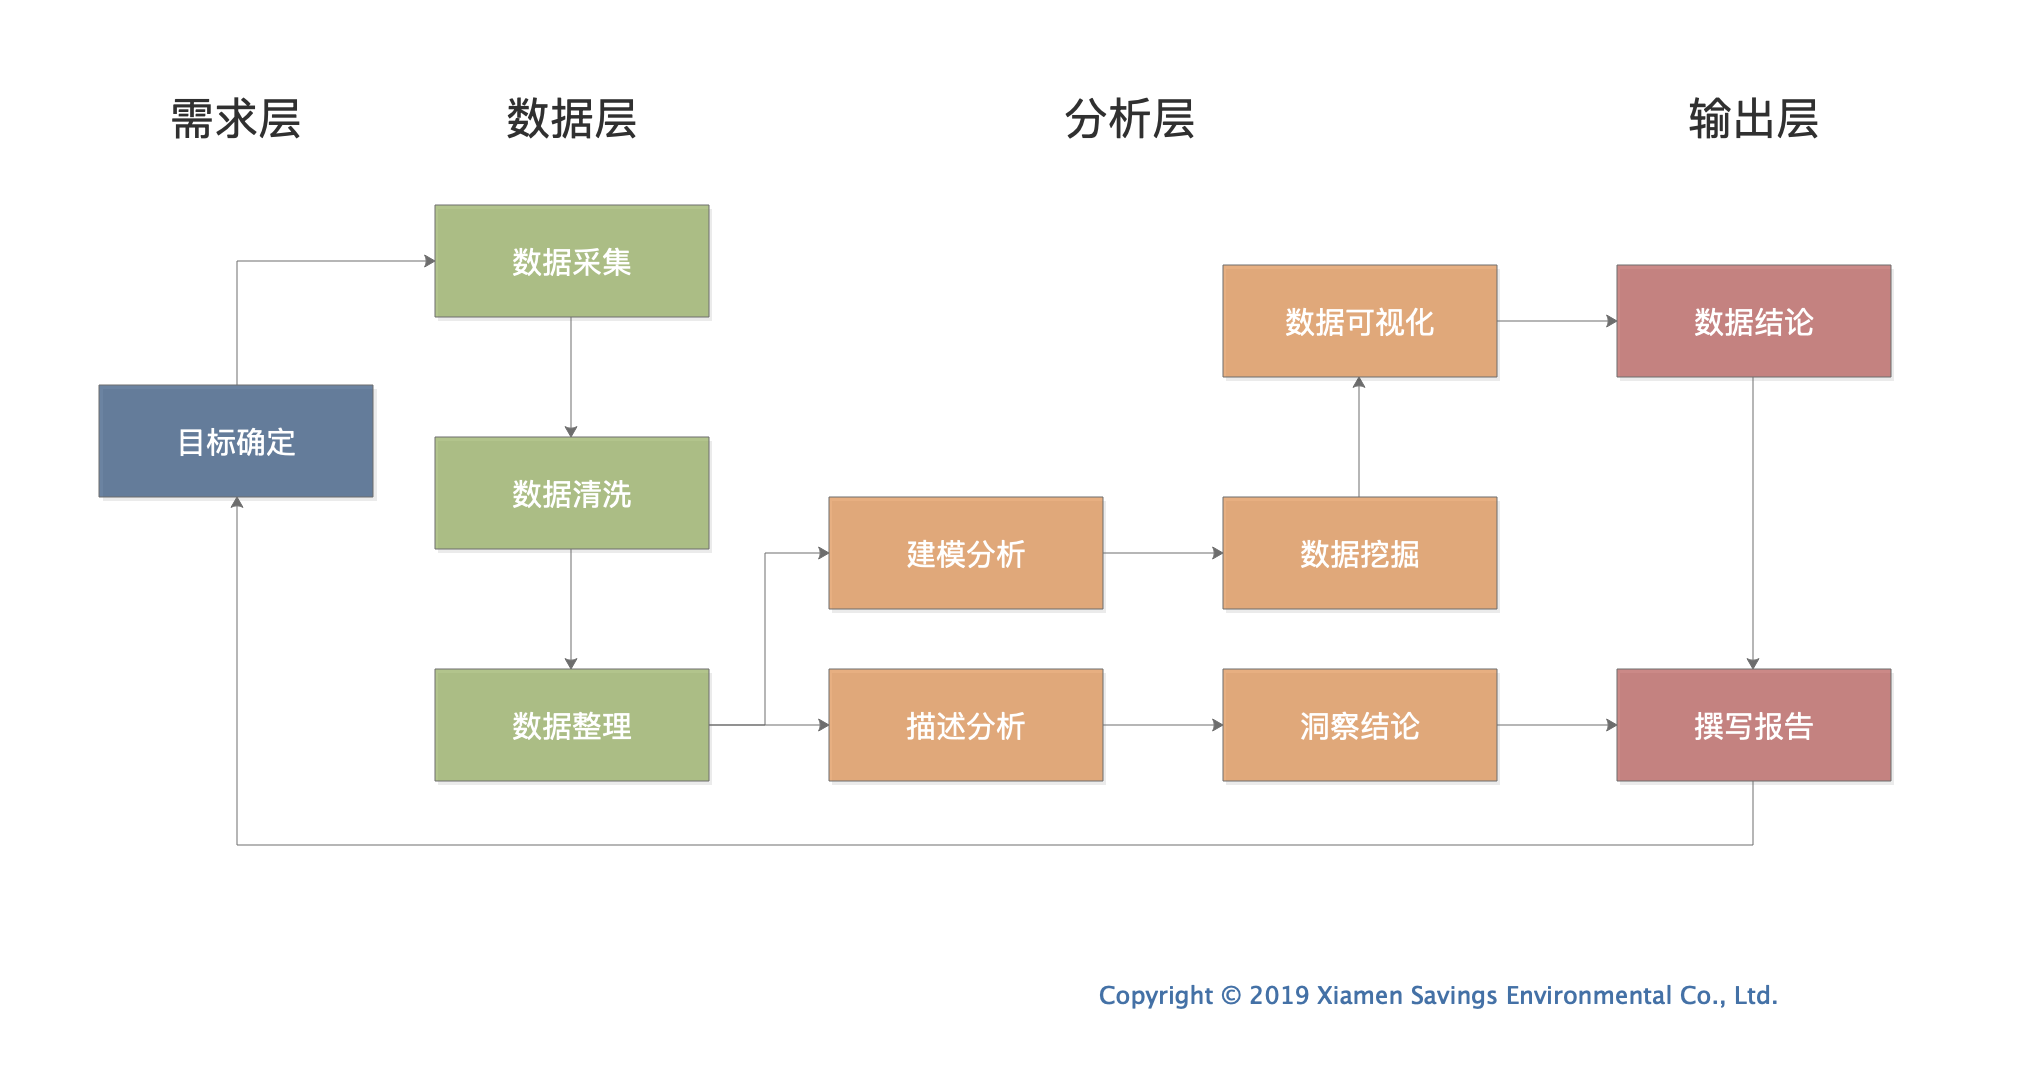

# 2. 数据准备

## 2.1 数据采集
### 采集过程中的约束问题
### 确保采集数据校验

In [1]:
# 导入相关库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
from chinese_calendar import is_workday
import warnings
from pylab import mpl   #处理X轴上 长的Label Name,另其偏转设定角度显示
import pylab as pl
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #显示汉字
plt.rcParams["axes.unicode_minus"]=False
%matplotlib inline 
 #matplotlib 魔法参数，免去生成图时反复使用plt.show() 命令

### 对表格数据进行预览
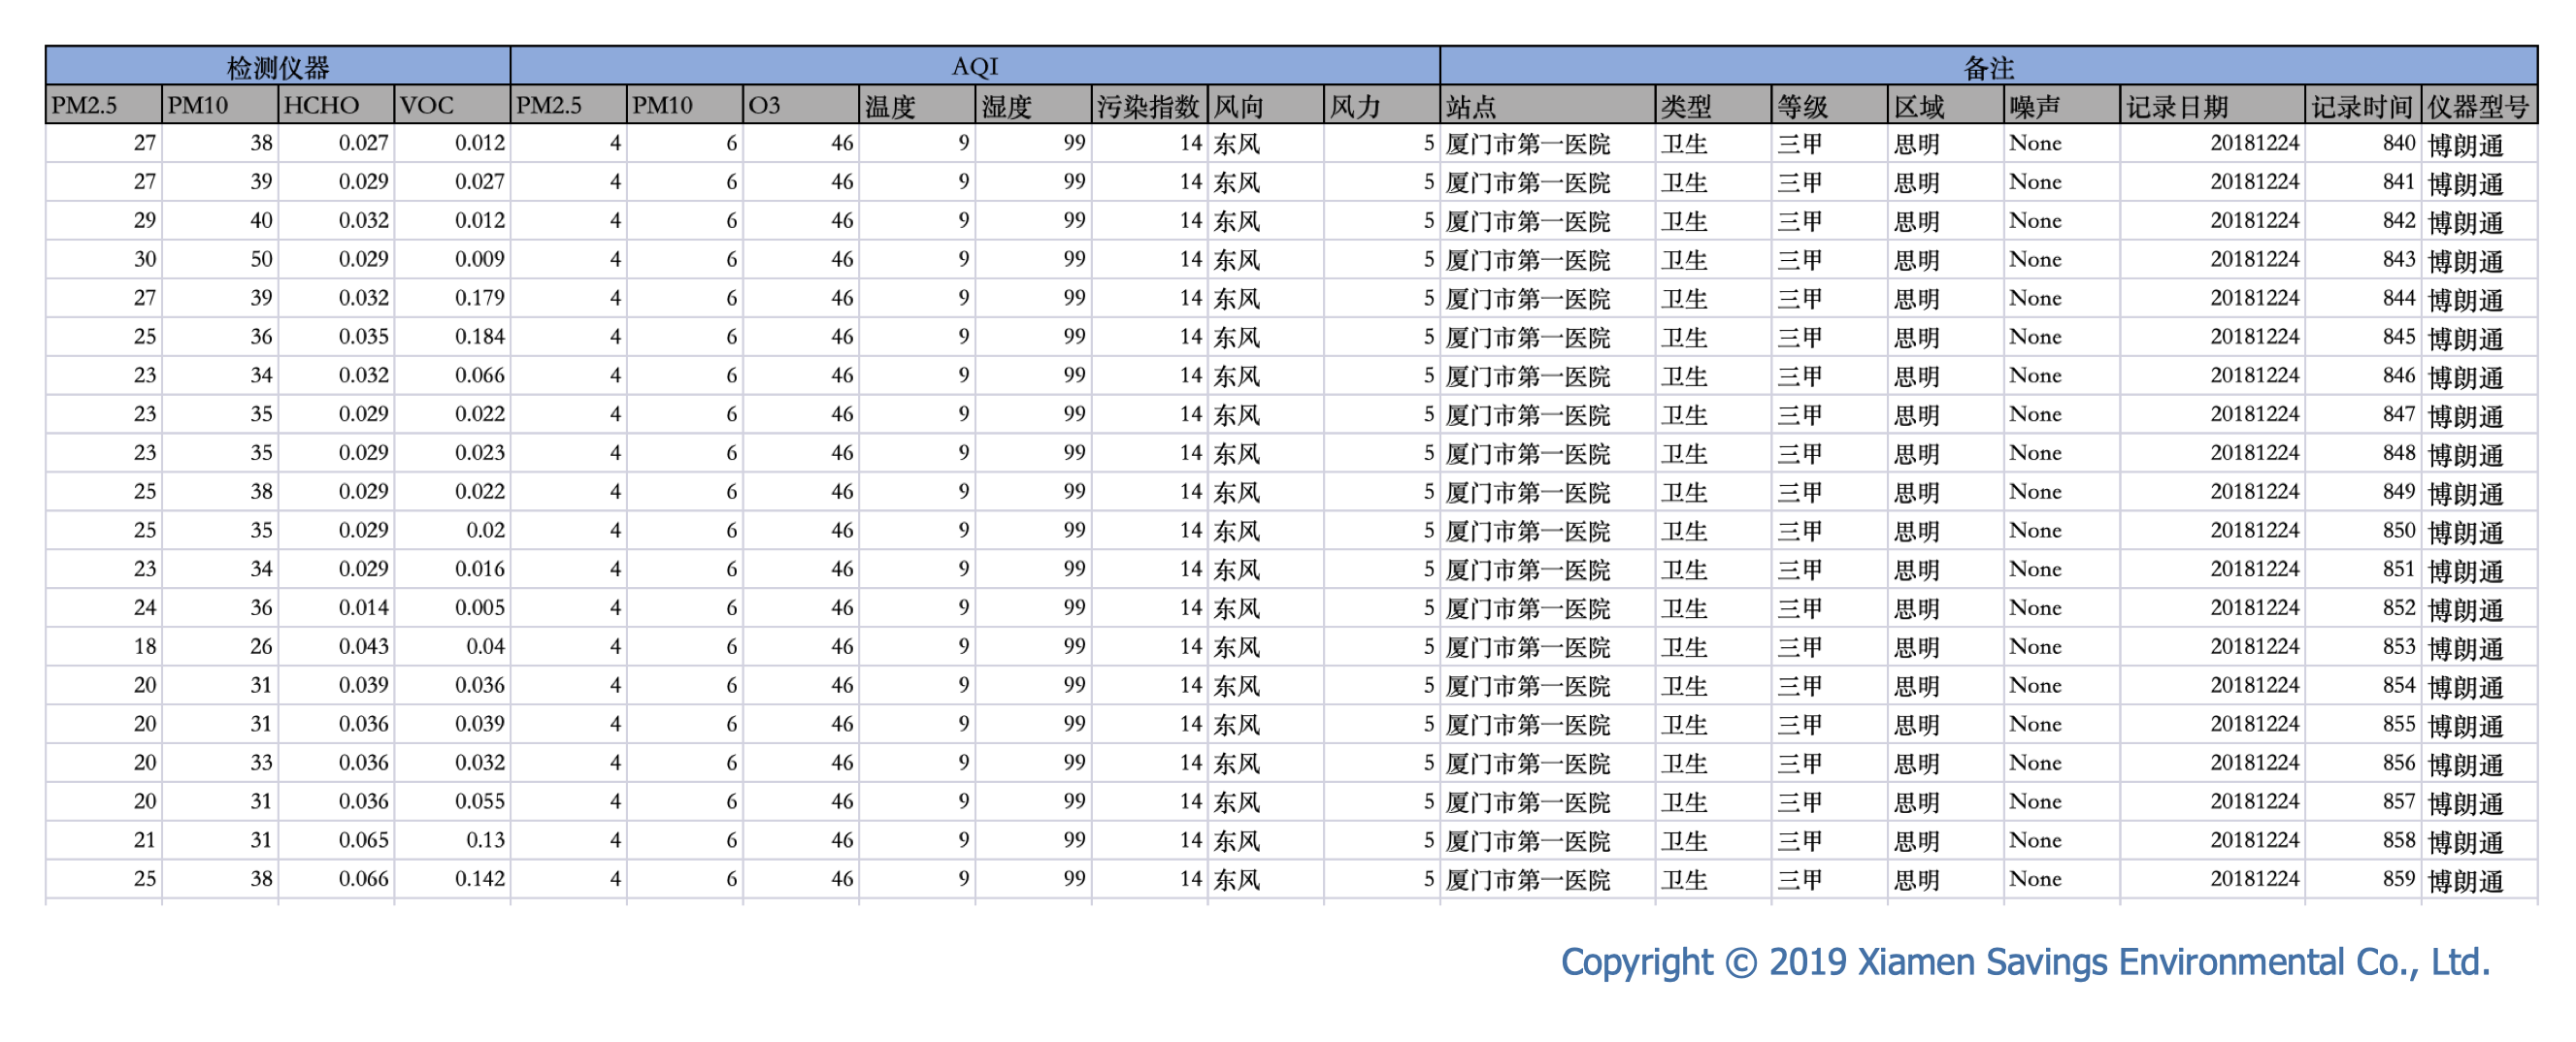

In [2]:
"""
1. 导入处理众多数据文件
2. 把.xlsx文件名存储到一个空白列表中
3. 通过对列表的打开循环，进行逐一提取合并
4. 合并存储在h_files中的表格，并对合并后的数据进行预览
"""
os.chdir('/Users/lin/Desktop/Air_data/raw_data')
filename = []
filename = !ls

h_files = []
n = 0
for file in filename:
    load_file = pd.read_excel(file,sheetname=0,header=1)
    n+=1
    h_files.append(load_file)
    print('第'+str(n)+'个表格已提取')

第1个表格已提取
第2个表格已提取
第3个表格已提取
第4个表格已提取
第5个表格已提取
第6个表格已提取
第7个表格已提取
第8个表格已提取
第9个表格已提取
第10个表格已提取
第11个表格已提取
第12个表格已提取
第13个表格已提取
第14个表格已提取
第15个表格已提取
第16个表格已提取
第17个表格已提取
第18个表格已提取
第19个表格已提取
第20个表格已提取
第21个表格已提取
第22个表格已提取
第23个表格已提取
第24个表格已提取
第25个表格已提取
第26个表格已提取
第27个表格已提取
第28个表格已提取
第29个表格已提取
第30个表格已提取
第31个表格已提取
第32个表格已提取
第33个表格已提取
第34个表格已提取
第35个表格已提取
第36个表格已提取
第37个表格已提取
第38个表格已提取
第39个表格已提取
第40个表格已提取
第41个表格已提取
第42个表格已提取
第43个表格已提取
第44个表格已提取
第45个表格已提取
第46个表格已提取
第47个表格已提取
第48个表格已提取
第49个表格已提取
第50个表格已提取
第51个表格已提取
第52个表格已提取


In [3]:
data_result = pd.concat(h_files,ignore_index=True)
data_result.head()

,PM2.5,PM10,HCHO,VOC,PM2.5.1,PM10.1,O3,温度,湿度,污染指数,风向,风力,站点,类型,等级,区域,噪声,记录日期,记录时间,仪器型号
0,12,16,0.016,0.053,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,815,博朗通
1,8,15,0.048,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,816,博朗通
2,9,17,0.068,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,817,博朗通
3,11,17,0.077,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,818,博朗通
4,11,17,0.082,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,三甲,思明,None,20190102,819,博朗通


# 3. 数据清洗

## 3.1列名重命名|剔除无效数据
观察数据结果，**<font color=red >噪声、仪器型号</font>**两项，由于项目进行过程中使用的均为同一款监测设备，而噪声由于测量环境难以规范，故剔除这两项数据。同时等级标签信息，选择的监测医院多为三甲医院，次级医院囿于时间进度，采集数量不足，因此也剔除早期设定的医院等级标签。
同时，为使得之后对数据的调用更加统一简便，对各数据标签名称进行重命名操作。

In [4]:
data = data_result.rename(columns={'温度':'Temp','湿度':'Humidity','污染指数':'AQI','风向':'Wind_Orient','风力':'Wind_Level',
                                '站点':'Location','类型':'Type','区域':'Zone','记录时间':'Time','记录日期':'Date'})
data = data.drop(['等级','噪声','仪器型号'],axis=1)

In [5]:
data.head()  #查看下数据

,PM2.5,PM10,HCHO,VOC,PM2.5.1,PM10.1,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,Location,Type,Zone,Date,Time
0,12,16,0.016,0.053,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,815
1,8,15,0.048,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,816
2,9,17,0.068,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,817
3,11,17,0.077,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,818
4,11,17,0.082,0,10,0,51,13,71,15,东北风,4,厦门眼科中心医院,卫生,思明,20190102,819


## 3.2 选取子集
：描述数据采集表中

`data` 数据集中，同一列同时包含了**设备**及**发布**的空气质量信息，将其按列进行拆分合并，以实现同一`Location`条件下数据比较进一步，同时存在两种监测类型、不同区域分布、时间段、温湿度等因素。

In [6]:
device_columns = ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', 'Temp',
       'Humidity', 'AQI', 'Wind_Orient', 'Wind_Level', 'Location', 'Type',
       'Zone', 'Date','Time']
public_columns = ['PM2.5.1', 'PM10.1', 'HCHO', 'VOC',  'O3', 'Temp',
       'Humidity', 'AQI', 'Wind_Orient', 'Wind_Level', 'Location', 'Type',
       'Zone', 'Date','Time']
device = data[device_columns]
public = data[public_columns]
device['Info_source'] = 'device'# Tag Info as 1 if it come from device
public['Info_source'] = 'public' # Tag Info as 0 if it come from public
public = public.rename(columns={'PM2.5.1':'PM2.5','PM10.1':'PM10'})
data_df = pd.concat(objs=[device,public],ignore_index=True)

In [7]:
len(data_df)

17678

### PM2.5 和 温度 等级划分
#### 空气质量“良”，也是一种伤害？| 观点(文章来源：知识分子)
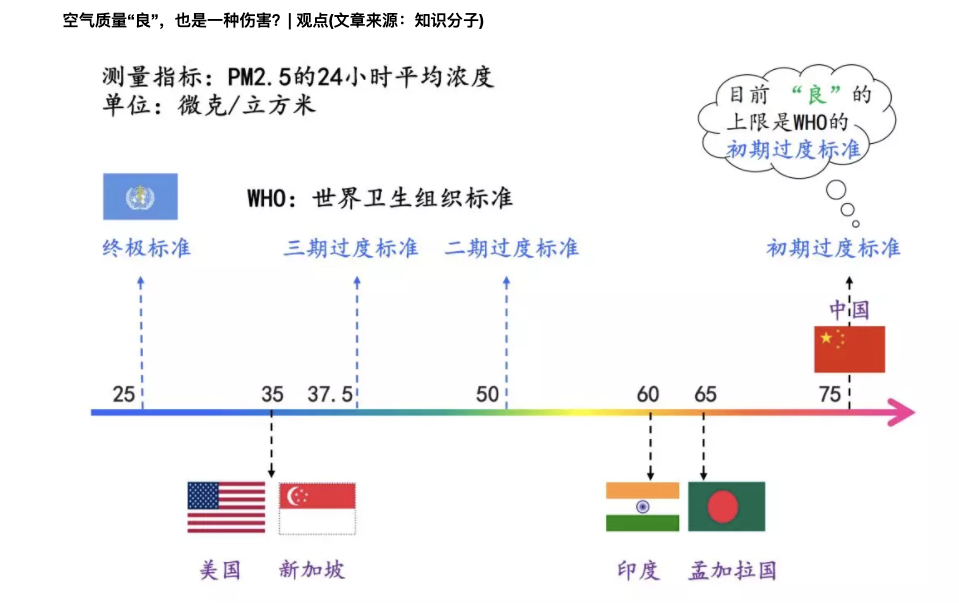

参考上表，我们将PM2.5数据进行4个等级的划分，分别为['Good','Mid','Bad','Terrible']；['under','above'];

温度按照[0,10,20,30]进行划分

In [8]:
# PM2.5划分等级
bins = [0,35,50,75,999]
labels = ['Good','Mid','Bad','Terrible']
data_df['PM2.5_level'] = pd.cut(data_df['PM2.5'],bins,labels=labels)

bins=[0,10,20,30]
data_df['Temp_Level'] = pd.cut(data_df['Temp'],bins)

bins=[0,35,999]
labels = ['under','above']
data_df['PM2.5_threshold'] = pd.cut(data_df['PM2.5'],bins,labels=labels)

### 划分时间（早、中、晚）（周末、工作日）
由于我们需要全面了解每个站点区域的空气质量变化情况，早期测量时按照早、中、晚三个时间区间进行数据采集，所以，根据采集记录的时间，划分出早、中、晚

In [9]:
### 数据类型转换
def transform_date(x):
    return pd.to_datetime(x,format='%Y%m%d', errors='ignore')

def transform_time(x):
    return datetime.strptime(str(x),'%H%M').strftime('%H:%M:%S')

def day_type(x):
    if is_workday(x):
        return 'W'
    else:
        return 'R'
    
#时间范围
"""morning: 06:30:00-10:00:00"""
"""noon: 11:30:00-16:29:00"""
"""night: 16:30:00-21:30:00"""
morning_1 = '06:30:00';morning_2='10:00:00'
noon_1 = '11:30:00';noon_2 = '16:29:00'
night_1 = '16:30:00';night_2 = '21:30:00'

# 判断当前时间是否在范围时间内
def Time_tag(x):
    if x>morning_1 and x<morning_2:
        return '早'
    if x>noon_1 and x<noon_2:
        return '午'
    if x>night_1 and x<night_2:
        return '晚'
    else:
        return '早'

In [10]:
data_df['Date'] = data_df.Date.map(lambda x:transform_date(x))
data_df['Time'] = data_df.Time.map(lambda x:transform_time(x))
data_df['Day_tags'] = data_df.Date.map(lambda x:day_type(x))
data_df['Time_tags'] = data_df.Time.map(lambda x:Time_tag(x))

### 站点合并
早期设计数据采集时，猜想安检口、候车站台空气质量数据会呈现出较大差别，而根据早期采集回来的数据结果显示，没有明显的数据统计特征支持而这部分内容，即不同功能区域、交通站点不同区域测点又写入各自的开题报告中，所以我们采取以下方式

- 统一合并处理同一站点不同测试位置
- 选择某个站点进行安检口、进站口和出站口数据分析，得出没有差别的结论，就此支持我们上一条的数据处理方法

In [11]:
"""把所有的站点Location调取出来，发现同一个物理站点，在不同的监测周期内的标记存在差别"""
data_df.Location.unique()

array(['厦门眼科中心医院', '火车站乘车1', '火车站乘车2', '火车站进站', '梧村汽车站', '厦门站出站口',
       '厦门站售票厅', '厦门市第三医院', '厦门市同安区中医院', '文灶站乘车1', '文灶站乘车2', '文灶站进站',
       '二市站乘车1', '二市站乘车2', '二市站进站', '斗西路站乘车1', '斗西路站乘车2', '斗西路站进站',
       '厦门北站售票厅', '厦门北站进站口', '厦门北站出站口', 'BRT厦门北站出站', 'BRT厦门北站进站',
       '厦门市同安区大嶝医院', '嘉庚体育馆乘车1', '嘉庚体育馆乘车2', '嘉庚体育馆进站', '厦门科宏眼科医院',
       '厦门市仙岳医院', '复旦中山医院', '厦门市中医院', '思北站乘车1', '思北站乘车2', '思北站进站',
       '第一码头乘车', '第一码头进站', '开禾路口站乘车1', '开禾路口站乘车2', '开禾路口站进站', '官任站进站',
       '官任站乘车', '吕厝站乘车', '吕厝站进站', '金山站乘车1', '金山站乘车2', '金山站进站',
       '市行政服务中心站乘车1', '市行政服务中心站乘车2', '市行政服务中心站进站', '龙山桥站乘车1', '龙山桥乘车2',
       '龙山桥进站', '莲坂站乘车1', '莲坂站乘车2', '莲坂站进站', '厦门市第五医院', '前埔枢纽站进站',
       '前埔枢纽站乘车', '洪文站乘车1', '洪文站乘车2', '洪文站进站', '卧龙晓城站乘车1', '卧龙晓城站乘车2',
       '卧龙晓城站进站', '东芳山庄站乘车1', '东芳山庄站乘车2', '东芳山庄站进站', '蔡塘站乘车1', '蔡塘站乘车2',
       '蔡塘站进站', '第一码头站乘车', '第一码头站进站', '厦门站进站口', '龙山桥站乘车2', '龙山桥站进站',
       '前埔站进站', '前埔站乘车', '县后站乘车1', '县后站乘车2', '县后站进站', '双十中学站乘车1',
       '双十中学站乘车2', '双十中学站进站', '厦门市妇幼保健院', 

In [12]:
#将各式称呼进行统一化处理：
title_Dict = {}
title_Dict.update(dict.fromkeys(['火车站乘车1', '火车站乘车2', '火车站进站'], '火车站'))
title_Dict.update(dict.fromkeys(['梧村汽车站', '梧村长途汽车站'], '梧村汽车站'))
title_Dict.update(dict.fromkeys(['厦门站出站口', '厦门站售票厅','厦门站出站', '厦门站售票', '厦门站进站','厦门站进站口'], '厦门站'))
title_Dict.update(dict.fromkeys(['文灶站乘车1', '文灶站乘车1','文灶站进站','文灶站乘车2','文灶站乘车2'], '文灶'))
title_Dict.update(dict.fromkeys(['斗西路站乘车1','斗西路站乘车2','斗西路进站'], '斗西路'))
title_Dict.update(dict.fromkeys(['厦门北站售票厅','厦门北站进站口', '厦门北站出站口','火车厦门北站进站','火车厦门北站售票', '火车厦门北站出站'], '厦门北站'))
title_Dict.update(dict.fromkeys(['BRT厦门北站出站', 'BRT厦门北站进站'], '厦门北'))
title_Dict.update(dict.fromkeys(['嘉庚体育馆乘车1','嘉庚体育馆站进站','嘉庚体育馆站乘车1', '嘉庚体育馆乘车2', '嘉庚体育馆站乘车2','嘉庚体育馆进站'], '嘉庚体育馆'))
title_Dict.update(dict.fromkeys(['思北站乘车1', '思北站乘车2', '思北站进站'], '思北站'))
title_Dict.update(dict.fromkeys([ '第一码头乘车', '第一码头进站','第一码头站乘车','第一码头站进站'], '第一码头站'))
title_Dict.update(dict.fromkeys(['开禾路口站乘车1', '开禾路口站乘车2', '开禾路口站进站'], '开禾路口'))
title_Dict.update(dict.fromkeys(['官任站进站','官任站乘车'], '官任'))
title_Dict.update(dict.fromkeys(['吕厝站乘车', '吕厝站进站'], '吕厝'))
title_Dict.update(dict.fromkeys(['金山站乘车1', '金山站乘车2', '金山站进站'], '金山'))
title_Dict.update(dict.fromkeys(['市行政服务中心站乘车1', '市行政服务中心站乘车2', '市行政服务中心站进站'], '市行政服务中心'))
title_Dict.update(dict.fromkeys(['龙山桥站乘车1', '龙山桥乘车2','龙山桥进站','龙山桥站乘车2', '龙山桥站进站'], '龙山桥'))
title_Dict.update(dict.fromkeys(['莲坂站乘车1', '莲坂站乘车2', '莲坂站进站'], '莲坂'))
title_Dict.update(dict.fromkeys(['前埔枢纽站进站','前埔枢纽站乘车','前埔站乘车','前埔站进站'], '前埔'))
title_Dict.update(dict.fromkeys(['洪文站乘车1', '洪文站乘车2', '洪文站进站'], '洪文'))
title_Dict.update(dict.fromkeys(['卧龙晓城站乘车1', '卧龙晓城站乘车2','卧龙晓城站进站'], '卧龙晓城'))
title_Dict.update(dict.fromkeys(['东芳山庄站乘车1', '东芳山庄站乘车2', '东芳山庄站进站'], '东芳山庄'))
title_Dict.update(dict.fromkeys(['蔡塘站乘车1', '蔡塘站乘车2','蔡塘站进站'], '蔡塘'))
title_Dict.update(dict.fromkeys(['双十中学站乘车1','双十中学站乘车2', '双十中学进站','双十中学站进站'], '双十中学'))
title_Dict.update(dict.fromkeys(['二市站乘车1','二市站乘车2', '二市站进站'], '二市'))
title_Dict.update(dict.fromkeys(['斗西路站乘车1', '斗西路站乘车2', '斗西路站进站'], '斗西路'))
title_Dict.update(dict.fromkeys(['官任站'], '官任'))
title_Dict.update(dict.fromkeys(['县后站乘车1', '县后站乘车2', '县后站进站'], '县后'))
title_Dict.update(dict.fromkeys(['西柯枢纽站乘车1', '西柯枢纽站乘车2', '西柯枢纽站进站'], '西柯'))
title_Dict.update(dict.fromkeys(['枋湖客运中心'], '枋湖客运中心'))
title_Dict.update(dict.fromkeys(['高崎火车站'], '高崎火车站'))
title_Dict.update(dict.fromkeys(['杏林汽车站'], '杏林汽车站'))
"""-------------------------------------------"""
title_Dict.update(dict.fromkeys(['厦门市第三医院'], '厦门市第三医院'))
title_Dict.update(dict.fromkeys(['厦门市同安区中医院'], '厦门市同安区中医院'))
title_Dict.update(dict.fromkeys(['厦门市同安区大嶝医院'], '厦门市同安区大嶝医院'))
title_Dict.update(dict.fromkeys(['厦门市第二医院门诊', '厦门市第二医院三号楼','厦门市第二医院'], '厦门市第二医院'))
title_Dict.update(dict.fromkeys(['厦门市第一医院杏林分院'], '厦门市第一医院杏林分院'))
title_Dict.update(dict.fromkeys(['厦门市第一医院'], '厦门市第一医院'))
title_Dict.update(dict.fromkeys(['厦门市中医院'], '厦门市中医院'))
title_Dict.update(dict.fromkeys(['厦门市集美区灌口医院'], '厦门市集美区灌口医院'))
title_Dict.update(dict.fromkeys(['厦门市中山医院'], '厦门市中山医院'))
title_Dict.update(dict.fromkeys(['厦门市妇幼保健院'], '厦门市妇幼保健院'))
title_Dict.update(dict.fromkeys(['解放军第一七四医院'], '解放军第一七四医院'))
title_Dict.update(dict.fromkeys(['厦门口腔医院'],'厦门口腔医院'))
title_Dict.update(dict.fromkeys(['厦门市第五医院'],'厦门市第五医院'))
title_Dict.update(dict.fromkeys(['厦门眼科中心医院'],'厦门眼科中心医院'))
title_Dict.update(dict.fromkeys(['厦门科宏眼科医院'],'厦门科宏眼科医院'))
title_Dict.update(dict.fromkeys(['厦门市仙岳医院'],'厦门市仙岳医院'))
title_Dict.update(dict.fromkeys(['复旦中山医院'],'复旦中山医院'))
title_Dict.update(dict.fromkeys(['厦门第一医院杏林院区'],'厦门第一医院杏林院区'))
title_Dict.update(dict.fromkeys(['厦门集美杏西医院'],'厦门集美杏西医院'))
title_Dict.update(dict.fromkeys(['厦门中山医院'],'厦门中山医院'))

data_df['Title'] = data_df['Location'].map(title_Dict)  

###  合并区域
对区域标签差别进行统一合并。

在标签数据方面，你们没有按照标准要求填写，如：思明区、思明，集美、集美区，所以我们需要将这两类标签合并统计

In [13]:
data_df[['Type','Zone']].groupby('Zone').count()

,Type
Zone,
同安,1248
思明,6648
思明区,2766
湖里,3416
翔安,634
集美,1916
集美区,1050


In [14]:
# data_df.locdata_df[data_df['Zone']=='思明区']['Zone'] = '思明'
data_df.Zone[data_df['Zone']=='思明'] = '思明区'
data_df.Zone[data_df['Zone']=='集美'] = '集美区'
data_df.Zone[data_df['Zone']=='同安'] = '同安区'
data_df.Zone[data_df['Zone']=='翔安'] = '翔安区'
data_df.Zone[data_df['Zone']=='湖里'] = '湖里区'

### 进行交通和卫生医院的数据划分：
- data_df  
- data_traffic  
- data_hygiene

In [15]:
data_traffic = data_df[data_df['Type']=='交通']
data_hygiene = data_df[data_df['Type']=='卫生']

In [16]:
"""分别进行输出保存"""
os.chdir('/Users/lin/Downloads/未命名文件夹/Air_detecting')
os.makedirs('tmp', exist_ok=True)
data_df.to_csv('data_df.csv',encoding='utf_8_sig')
data_traffic.to_csv('data_traffic.csv',encoding='utf_8_sig')
data_hygiene.to_csv('data_hygiene.csv',encoding='utf_8_sig')

### 交通、卫生与测量、发布数据切分

In [17]:
traffic = data_df[data_df['Type']=='交通']
traffic_device = data_df[(data_df['Type']=='交通')&(data_df['Info_source']=='device')]
traffic_public = data_df[(data_df['Type']=='交通')&(data_df['Info_source']=='public')]
"""----------"""
hygiene = data_df[data_df['Type']=='卫生']
hygiene_device = data_df[(data_df['Type']=='卫生')&(data_df['Info_source']=='device')]
hygiene_public = data_df[(data_df['Type']=='卫生')&(data_df['Info_source']=='public')]

由此，我们获得了6类子集数据
- traffic  交通站点空气记录数据
- traffic_device  交通站点_设备空气记录数据
- traffic_public  交通站点_发布空气记录数据
- hygiene  卫生站点空气记录数据
- hygiene_device  卫生站点_设备空气记录数据
- hygiene_public  卫生站点_发布空气记录数据

## 3.3 异常值处理

异常点原因分析：
1. 仪器偏差
2. 测量环境条件瞬时变化，如过往行人使用香水、发胶等
3. 路经烧烤摊
4. 。。。

设定规则： 剔除远离数据群的离散点,以低于五个点聚类的数值进行选取

### 交通异常值处理

In [18]:
traffic[traffic['PM2.5']>150]

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Day_tags,Time_tags,Title
2755,169,193,0.0,0.57,29,16,85,68,东南风,微风,...,思明区,2019-03-02,08:19:00,device,Terrible,"(10, 20]",above,R,早,斗西路


In [19]:
traffic[traffic['Zone']=='湖里区'][traffic['PM2.5']>120]

,PM2.5,PM10,HCHO,VOC,O3,Temp,Humidity,AQI,Wind_Orient,Wind_Level,...,Zone,Date,Time,Info_source,PM2.5_level,Temp_Level,PM2.5_threshold,Day_tags,Time_tags,Title
5782,143,235,0.052,0.132,19,21,72,59,东北风,3-4级,...,湖里区,2018-12-11,11:17:00,device,Terrible,"(20, 30]",above,W,早,吕厝


In [20]:
traffic = traffic.drop(index=[2755,5782],axis=0)

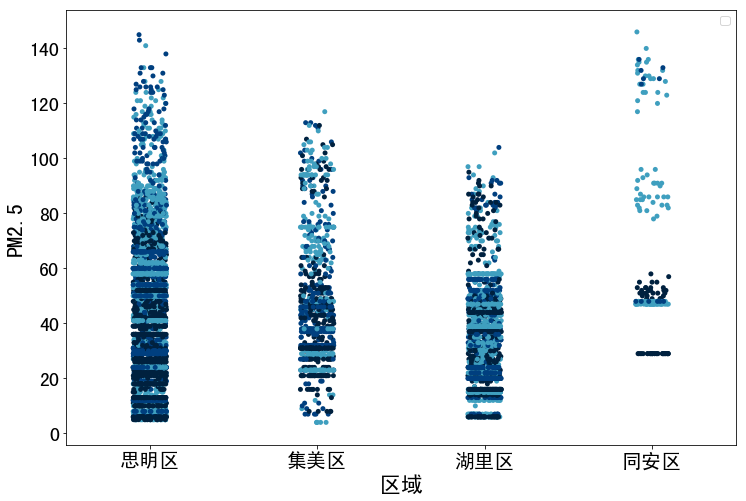

In [21]:
plt.figure(figsize=(12,8))
ax=sns.stripplot(x='Zone',y='PM2.5',hue='Time_tags',jitter=True,data=traffic,palette='ocean_r')
ax.set_xlabel('区域',fontsize=22)
ax.set_ylabel('PM2.5',fontsize=22)
# ax.legend(fontsize=18)
# plt.legend(('Morning','Noon','Night'),loc='best',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('交通：不同区域、时段与PM2.5数值分布关系图',fontsize=20)
plt.legend((),loc='best',fontsize=12)
# plt.savefig('交通：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=400,bbox_inches = 'tight')

### 医院异常值处理

思明区、湖里区存在两个明显高于聚类区域的离散数值，因此我们根据约定规则，对其进行剔除处理

In [22]:
hygiene[hygiene['Zone']=='同安区'][hygiene['PM2.5']>60].index

Int64Index([453], dtype='int64')

In [23]:
hygiene[hygiene['Zone']=='湖里区'][hygiene['PM2.5']>60].index

Int64Index([1738, 7339, 7528, 7529], dtype='int64')

In [24]:
hygiene[hygiene['Zone']=='思明区'][hygiene['PM2.5']>110].index

Int64Index([3730], dtype='int64')

In [25]:
hygiene[hygiene['Zone']=='翔安区'][hygiene['PM2.5']>60].index

Int64Index([2474, 2475, 2476, 2477], dtype='int64')

In [26]:
hygiene[hygiene['Zone']=='集美区'][hygiene['PM2.5']>120].index

Int64Index([4479, 4480], dtype='int64')

In [27]:
hygiene = hygiene.drop(index=[453,1738, 7339, 7528, 7529,3730,2474, 2475, 2476, 2477,4479, 4480],axis=0)

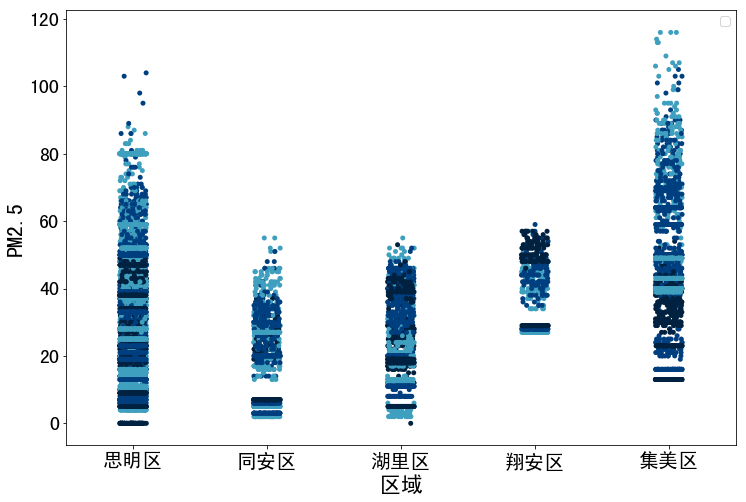

In [28]:
plt.figure(figsize=(12,8))
# sns.set_palette('ocean_r')
ax=sns.stripplot(x='Zone',y='PM2.5',hue='Time_tags',jitter=True,data=hygiene,palette='ocean_r')
ax.set_xlabel('区域',fontsize=22)
ax.set_ylabel('PM2.5',fontsize=22)
# ax.legend(fontsize=18)
# plt.legend(('早','午','晚'),loc='best',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('交通：不同区域、时段与PM2.5数值分布关系图',fontsize=20)
plt.legend((''),loc='best',fontsize=12)
# plt.savefig('异常点处理——交通：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=400,bbox_inches = 'tight')

### 缺失值处理
结果表明，各列数据均为`17678`，不存在缺失数据。

In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17678 entries, 0 to 17677
Data columns (total 22 columns):
PM2.5              17678 non-null int64
PM10               17678 non-null int64
HCHO               17678 non-null float64
VOC                17678 non-null object
O3                 16738 non-null object
Temp               17678 non-null int64
Humidity           17678 non-null int64
AQI                17678 non-null int64
Wind_Orient        17678 non-null object
Wind_Level         17678 non-null object
Location           17678 non-null object
Type               17678 non-null object
Zone               17678 non-null object
Date               17678 non-null datetime64[ns]
Time               17678 non-null object
Info_source        17678 non-null object
PM2.5_level        17595 non-null category
Temp_Level         17678 non-null category
PM2.5_threshold    17595 non-null category
Day_tags           17678 non-null object
Time_tags          17678 non-null object
Title              1

# 4. 数据分析

## 4.1 信息源维度

### 交通：设备 V.S 发布  空气质量等级占比

首先，我们从表官上看看发布数据与测试采集数据的差异情况：
发布信息中，空气质量【优】的占比高达62.0%，【恶劣】占比仅占0.5%，而我们针对交通站点测试的情况表明，4个等级的空气质量占比约1/4。说明区域发布的信息数据无法准确表征特殊地点的数据，且之间的偏差值巨大，这就为交通站点空气质量净化课题的研究提供的证据

In [30]:
from pyecharts import options as opts
from pyecharts.charts import Pie, Page
from pyecharts.commons.utils import JsCode

def transform_pie_graph(x):
    x = x.value_counts()
    x_perc = x/x.sum()
    x_perc = np.round(x_perc*100,2)
    return x_perc

In [31]:
m_traffic = transform_pie_graph(traffic_public['PM2.5_level'])

m_traffic2 = transform_pie_graph(traffic_device['PM2.5_level'])

In [32]:
pie1 = Pie(init_opts = opts.InitOpts(width='950px',height='600px'))
pie1.add("",[*zip(m_traffic.index,m_traffic.values)],radius=["35%", "60%"],center=["30%", "50%"])
pie1.add("",[*zip(m_traffic2.index,m_traffic2.values)],radius=["35%", "60%"],center=["75%", "50%"])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='交通：发布 | 设备  空气质量等级占比'),
                     legend_opts=opts.LegendOpts(orient="vertical", pos_top="5%", pos_left="2%"),
                     toolbox_opts=opts.ToolboxOpts())
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{c}%")) 
pie1.render_notebook()

### 卫生：设备 V.S 发布 空气质量占比
同样，我们看看卫生医院的实地空气质量状况。结果表明：医院的空气质量总体上接近于区域发布数据，但由于人流活动等情况，造成采集的中等空气质量占比高于发布数据。而1.1%的严重污染空气的占比，可以结合你们各自检测实地情况进行解释。

In [33]:
m_hygiene = transform_pie_graph(hygiene_public['PM2.5_level'])

m_hygiene2 = transform_pie_graph(hygiene_device['PM2.5_level'])

In [34]:
pie1 = Pie(init_opts = opts.InitOpts(width='950px',height='600px'))
pie1.add("",[*zip(m_hygiene.index,m_hygiene.values)],radius=["35%", "60%"],center=["30%", "50%"])
pie1.add("",[*zip(m_hygiene2.index,m_hygiene2.values)],radius=["35%", "60%"],center=["75%", "50%"])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='医院：发布 | 设备  空气质量等级占比'),
                     legend_opts=opts.LegendOpts(orient="vertical", pos_top="5%", pos_left="2%"),
                     toolbox_opts=opts.ToolboxOpts())
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{c}%")) 
pie1.render_notebook()

In [35]:
h_public = hygiene_public['PM2.5_level'].value_counts()
h_device = hygiene_device['PM2.5_level'].value_counts()
h_df=pd.DataFrame({u'public':h_public, u'device':h_device})

h_df['public'].tolist()
h_df['device'].tolist()
h_df.index

CategoricalIndex(['Good', 'Mid', 'Bad', 'Terrible'], categories=['Good', 'Mid', 'Bad', 'Terrible'], ordered=True, dtype='category')

In [36]:
 #先导入Jupyter notebook渲染插件
from pyecharts.globals import CurrentConfig, NotebookType
 CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
from pyecharts.charts import Bar

bar = (
    Bar()
    .add_xaxis(['Good', 'Mid', 'Bad', 'Terrible'])
    .add_yaxis("发布", h_df['public'].tolist())
    .add_yaxis("设备", h_df['device'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="医院：不同数据源、空气质量等级统计"))
)
bar.render_notebook()

In [37]:
t_public = traffic_public['PM2.5_level'].value_counts()
t_device = traffic_device['PM2.5_level'].value_counts()
t_df=pd.DataFrame({u'public':h_public, u'device':h_device})

t_df['public'].tolist()
t_df['device'].tolist()
t_df.index

CategoricalIndex(['Good', 'Mid', 'Bad', 'Terrible'], categories=['Good', 'Mid', 'Bad', 'Terrible'], ordered=True, dtype='category')

In [38]:
bar = (
    Bar()
    .add_xaxis(['Good', 'Mid', 'Bad', 'Terrible'])
    .add_yaxis("发布", t_df['public'].tolist())
    .add_yaxis("设备", t_df['device'].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="交通：不同数据源、空气质量等级统计"))
)
bar.render_notebook()

In [42]:
p_t = public[public['Type']=='交通']['PM2.5']
d_t = device[device['Type']=='交通']['PM2.5']
p_h = public[public['Type']=='卫生']['PM2.5']
d_h = device[device['Type']=='卫生']['PM2.5']

In [64]:
from pyecharts.charts import Boxplot

v1 = [p_t,d_t]
v2 = [p_h,d_h]
c = Boxplot()
c.add_xaxis(["发布", "设备"])
c.add_yaxis("交通", c.prepare_data(v1))
c.add_yaxis("卫生", c.prepare_data(v2))
c.set_global_opts(title_opts=opts.TitleOpts(title="BoxPlot-基本示例"))
c.render_notebook()

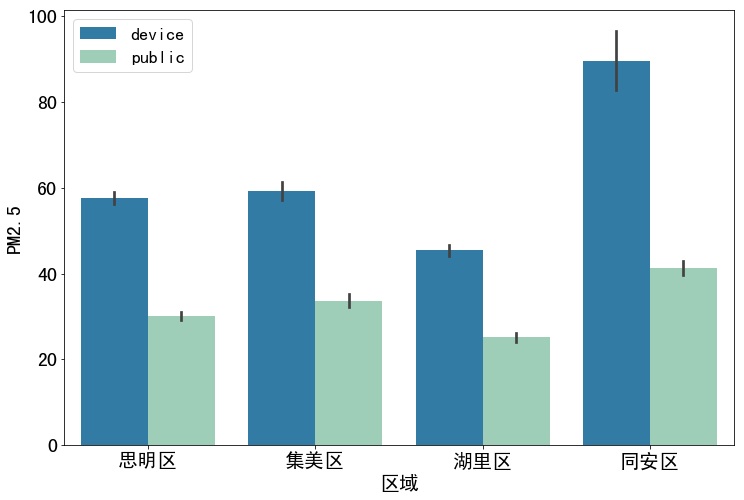

In [65]:
plt.figure(figsize=(12,8))
ax = sns.barplot('Zone','PM2.5',hue='Info_source',data=traffic, palette="YlGnBu_r")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('不同区、数据源PM2.5数据源比',fontsize=18)
ax.set_xlabel("区域",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
ax.legend(fontsize=18)

# plt.margins(0,0)
# plt.savefig('btq.jpg',dpi=400,pad_inches = 0,bbox_inches = 'tight')
plt.savefig('不同区PM2.5数据源对比.jpg',dpi=400,bbox_inches = 'tight')

In [66]:
print("医院系统：发布数据@空气质量")
hygiene_public['PM2.5_level'].value_counts().to_frame()

医院系统：发布数据@空气质量


,PM2.5_level
Good,4360
Mid,1003
Bad,344
Terrible,165


In [67]:
print("交通系统：发布数据@空气质量")
traffic_public['PM2.5_level'].value_counts().to_frame()

交通系统：发布数据@空气质量


,PM2.5_level
Good,1788
Mid,639
Bad,443
Terrible,15


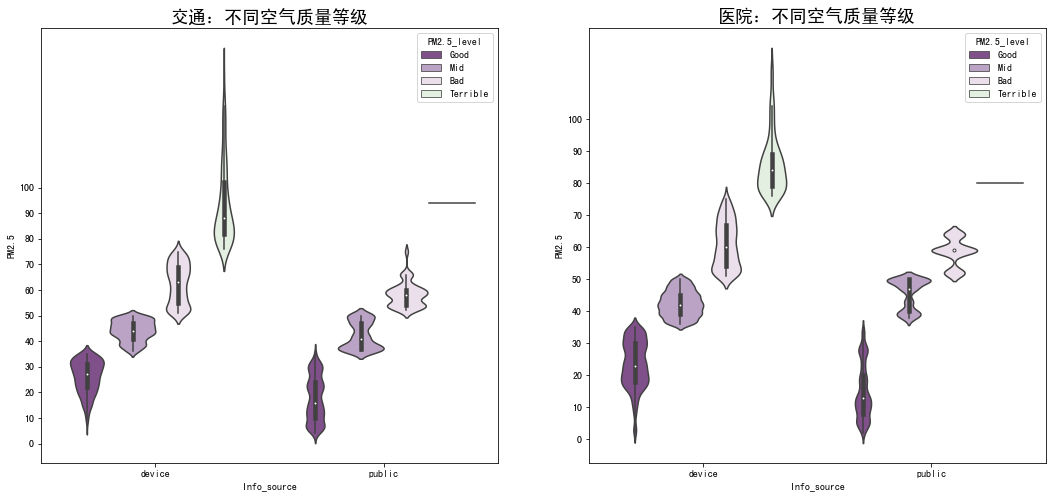

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Info_source", "PM2.5", hue="PM2.5_level", data=traffic, ax=ax[0])
ax[0].set_title('交通：不同空气质量等级',fontsize=18)
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Info_source", "PM2.5", hue="PM2.5_level", data=hygiene, ax=ax[1])
ax[1].set_title('医院：不同空气质量等级',fontsize=18)
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 交通|医院：不同数据源下，各数值对应的密度图
图示说明： 发布数据区间值主要在[0,60]，而设备数据主要在[30,80]之间，且拖尾部分数值延迟至160+

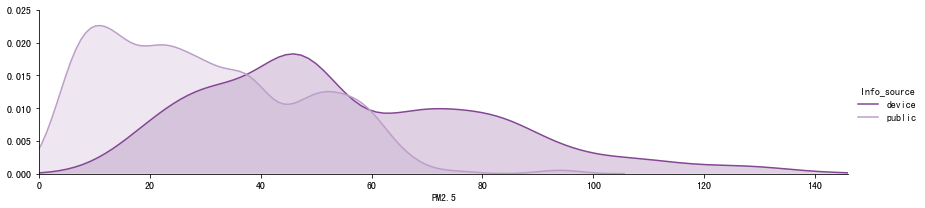

In [69]:
facet = sns.FacetGrid(traffic,hue='Info_source',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,traffic['PM2.5'].max()))
facet.set(ylim=(0,0.025))
facet.add_legend()

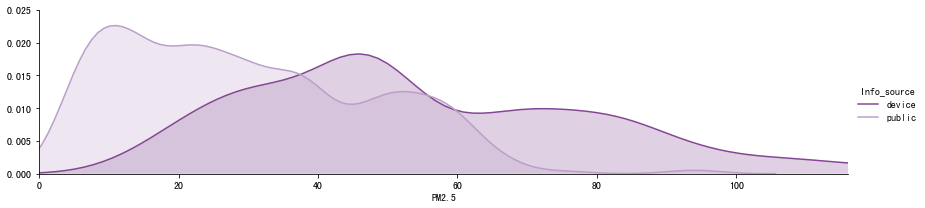

In [70]:
facet = sns.FacetGrid(traffic,hue='Info_source',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,hygiene['PM2.5'].max()))
facet.set(ylim=(0,0.025))
facet.add_legend()

### 交通|医院：不同数据源下，各数值对应的柱状图

Text(0.5,1,'交通：不同数据源不同时间段下PM2.5平均值对比')

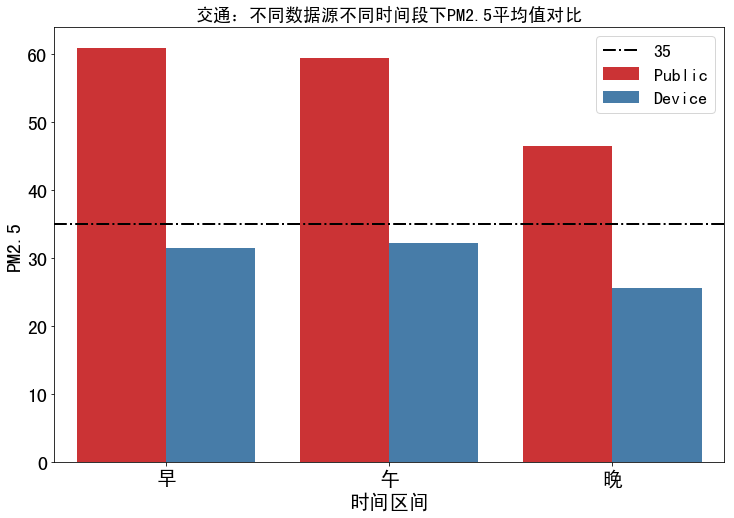

In [71]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
# plt.grid(linestyle="--")
# av = traffic[["PM2.5", "Time_Tags"]].groupby(['Time_Tags'],as_index=False).mean()
ax = sns.barplot(x='Time_tags', y='PM2.5',hue='Info_source',data = traffic,order=['早','午','晚'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_xlabel("Time_episode",fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
plt.title('交通：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

Text(0.5,1,'医院：不同数据源不同时间段下PM2.5平均值对比')

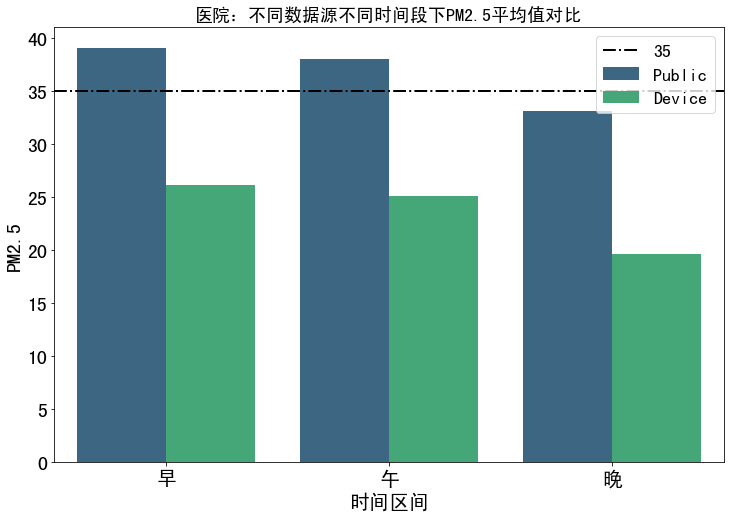

In [72]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Time_tags', y='PM2.5',hue='Info_source',data = hygiene,order=['早','午','晚'],ci=None,palette="viridis")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
plt.title('医院：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

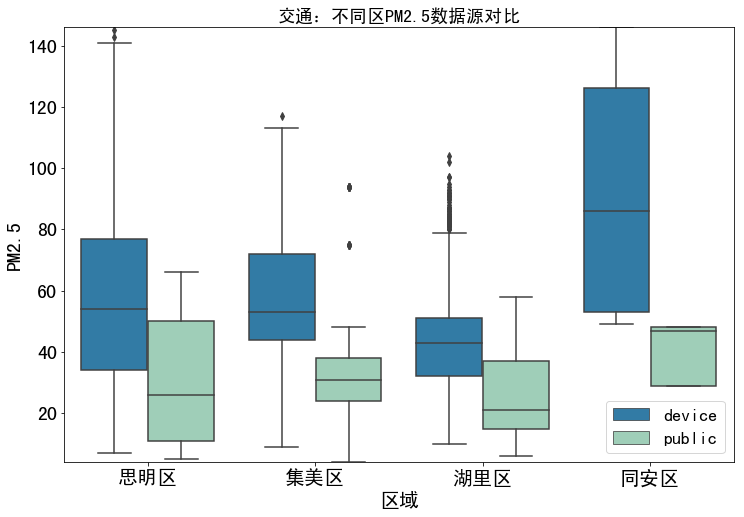

In [73]:
plt.figure(figsize=(12,8))
ax = sns.boxplot('Zone','PM2.5',hue='Info_source',data=traffic, palette="YlGnBu_r")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区PM2.5数据源对比',fontsize=18)
ax.set_xlabel("区域",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
ax.legend(fontsize=18)

plt.margins(0,0)
# plt.savefig('btq.jpg',dpi=400,pad_inches = 0,bbox_inches = 'tight')
# plt.savefig('交通：不同区PM2.5数据源对比.jpg',dpi=400)

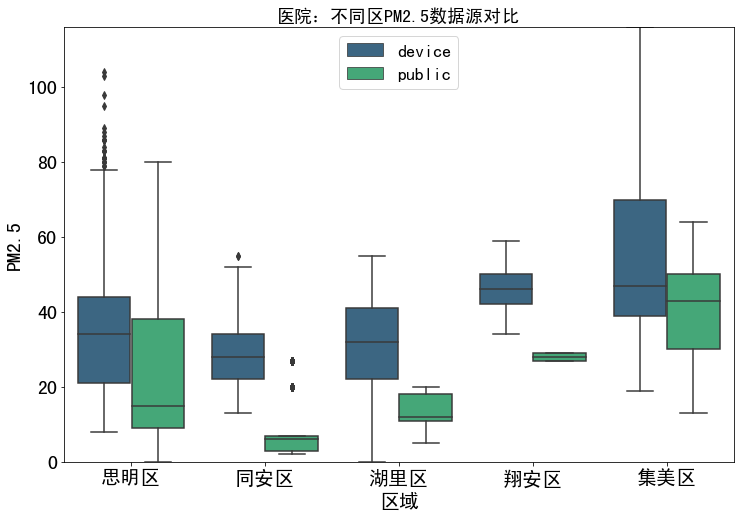

In [74]:
plt.figure(figsize=(12,8))
ax = sns.boxplot('Zone','PM2.5',hue='Info_source',data=hygiene, palette="viridis")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('医院：不同区PM2.5数据源对比',fontsize=18)
ax.set_xlabel("区域",fontsize=20)
ax.set_ylabel("PM2.5",fontsize=20)
ax.legend(fontsize=18)

plt.margins(0,0)
# plt.savefig('btq.jpg',dpi=400,pad_inches = 0,bbox_inches = 'tight')
# plt.savefig('交通：不同区PM2.5数据源对比.jpg',dpi=400)

### 对交通站点PM2.5的平均值进行分类统计

In [75]:
traffic_mean = traffic_device[["PM2.5",'Title']].groupby(['Title'],as_index=False).mean()
traffic_mean = traffic_mean.sort_values(by='PM2.5',ascending=False)

In [76]:
traffic_mean.head()

,Title,PM2.5
25,西柯,89.544444
16,斗西路,79.821705
1,二市,78.356589
5,厦门北站,71.025641
20,洪文,68.883041


Text(0.5,0,'交通站点')

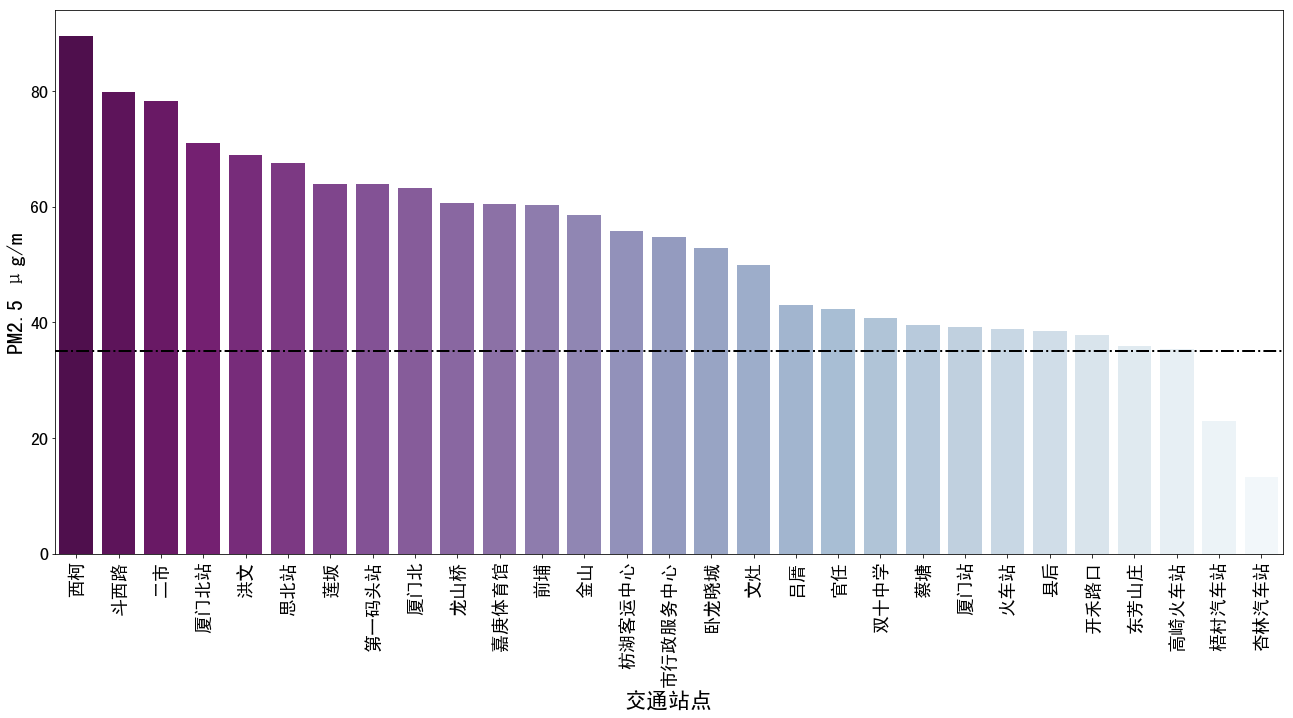

In [77]:
plt.figure(figsize=(22,10))
x= traffic_mean['Title']
y = traffic_mean['PM2.5']
sns.barplot(x,y,palette='BuPu_r')
plt.yticks(fontsize=18)
plt.ylabel('PM2.5 μg/m³',fontsize=22)
plt.xticks(fontsize=18)
plt.axhline(y=35,c='black',ls='-.',lw='2')
# plt.title('交通站点空气超标率排列',fontsize=22)
pl.xticks(rotation=90)
plt.xlabel('交通站点',fontsize=22)
# plt.savefig('')
# plt.savefig('交通站点空气PM2.5排列.jpg',dpi=400,bbox_inches = 'tight')

### 对医院PM2.5的平均值进行分类统计

In [94]:
hygiene_mean = hygiene_device[["PM2.5",'Title']].groupby(['Title'],as_index=False).mean()
hygiene_mean = hygiene_mean.sort_values(by='PM2.5',ascending=False)

In [95]:
hygiene_mean.head()

,Title,PM2.5
13,厦门市集美区灌口医院,72.540816
17,厦门集美杏西医院,59.276423
16,厦门第一医院杏林院区,53.478261
9,厦门市第一医院杏林分院,49.117188
11,厦门市第二医院,48.804154


Text(0.5,0,'交通站点')

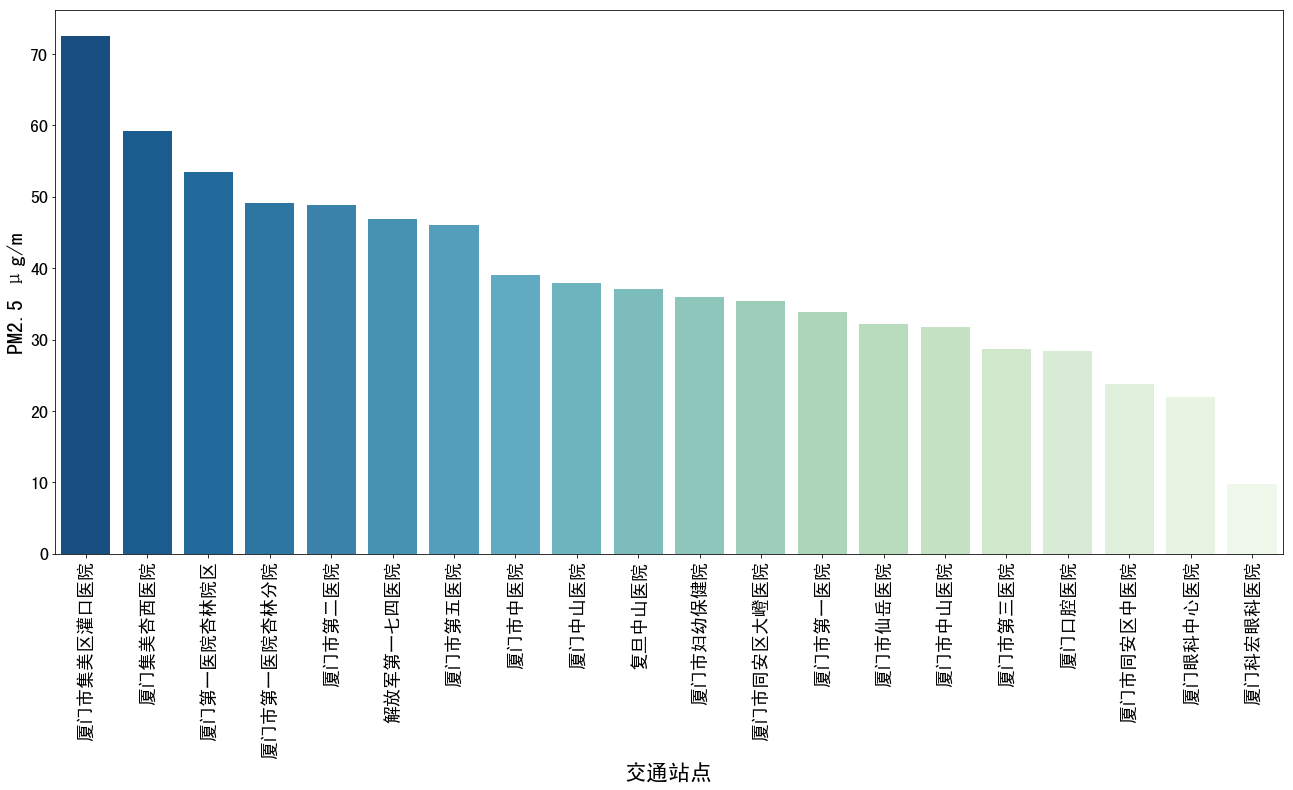

In [96]:
plt.figure(figsize=(22,10))
x= hygiene_mean['Title']
y = hygiene_mean['PM2.5']
sns.barplot(x,y,palette='GnBu_r')
plt.yticks(fontsize=18)
plt.ylabel('PM2.5 μg/m³',fontsize=22)
plt.xticks(fontsize=18)
# plt.title('交通站点空气超标率排列',fontsize=22)
pl.xticks(rotation=90)
plt.xlabel('交通站点',fontsize=22)
# plt.savefig('')
# plt.savefig('交通站点空气PM2.5排列.jpg',dpi=400,bbox_inches = 'tight')

Text(6.8,0.5,'PM10')

<Figure size 1296x576 with 0 Axes>

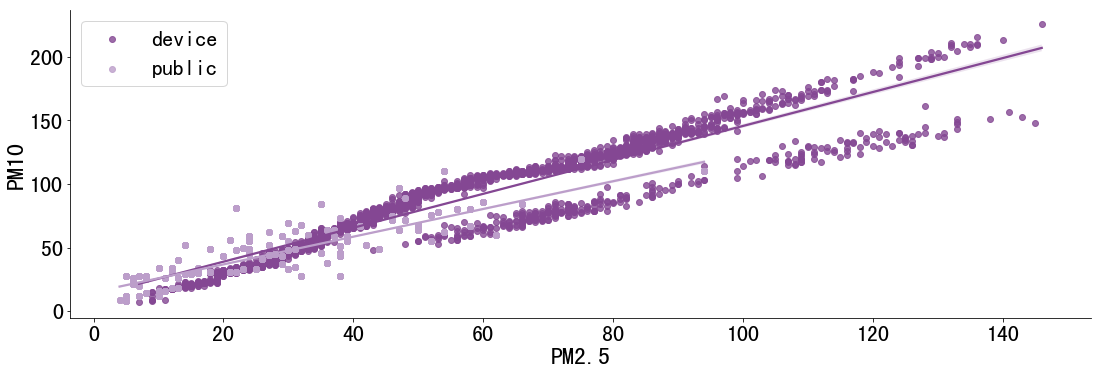

In [97]:
"""对交通数据的PM2.5和PM10的相关性做回归处理"""
plt.figure(figsize=(18,8))
sns.lmplot(x='PM2.5',y='PM10',data=traffic,hue='Info_source',aspect=3,legend=False)
plt.xlabel('PM2.5',fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)
plt.ylabel('PM10',fontsize=24)
# plt.title('交通：PM2.5与PM10相关性',fontsize=20)
# plt.savefig('PM2.5与PM10相关性.jpg',dpi=400,bbox_inches = 'tight')

## 4.2 区域维度

结果表明：空气质量排名
思明 > 湖里 > 集美 > 同安
虽然同安只有一个站点（西柯站），但在3次不同天重复测量下，其PM2.5数值仍远高过气象发布值，说明西柯站的周边环境对PM2.5的影响巨大。

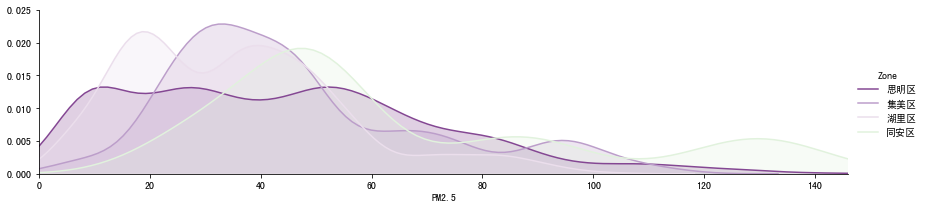

In [98]:
facet = sns.FacetGrid(traffic,hue='Zone',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,traffic['PM2.5'].max()))
facet.set(ylim=(0,0.025))
facet.add_legend()

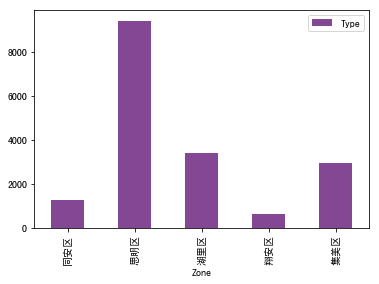

In [99]:
data_df[['Type','Zone']].groupby('Zone').count().plot.bar()

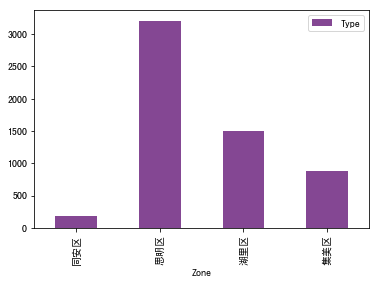

In [100]:
traffic[['Type','Zone']].groupby('Zone').count().plot.bar()

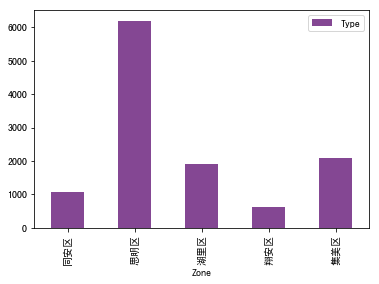

In [101]:
hygiene[['Type','Zone']].groupby('Zone').count().plot.bar()

Text(0.5,1,'交通：不同区域、数据源与PM10关系')

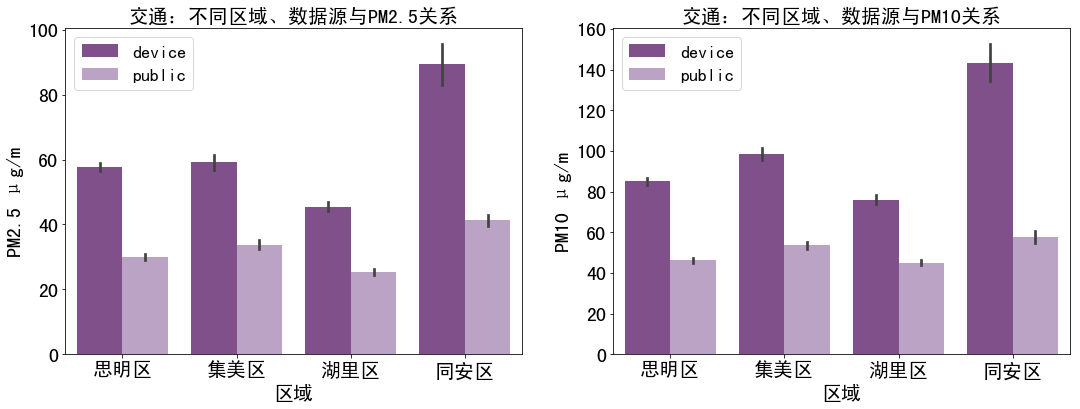

In [102]:
"""同一系统条件下，不同区域zone的测量数据与平均值PM2.5/10的比较"""
#先进行交通traffic的比较

plt.figure(figsize=(18,6))
sns.set_palette('PRGn')
plt.subplot(121)
sns.barplot(x='Zone',y='PM2.5',hue='Info_source',data=traffic)
plt.xlabel('区域',fontsize=20)
plt.ylabel('PM2.5 μg/m³',fontsize=20)
plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、数据源与PM2.5关系',fontsize=20)


plt.subplot(122)
sns.barplot(x='Zone',y='PM10',hue='Info_source',data=traffic)
plt.xlabel('区域',fontsize=20)
plt.ylabel('PM10 μg/m³',fontsize=20)
plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('交通：不同区域、数据源与PM10关系',fontsize=20)
# plt.savefig('交通：不同区域、数据源与PM2.5关系.jpg',dpi=400)

Text(0.5,1,'卫生：不同区域、时段与PM2.5关系')

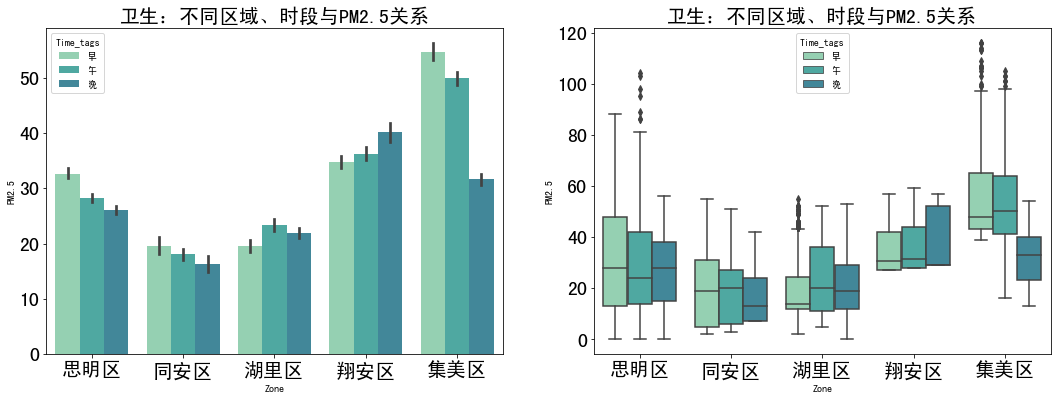

In [103]:
"""同一系统下，同一区域，不同时间段测量的数据的平均值PM2.5/10比较"""
plt.figure(figsize=(18,6))
sns.set_palette('mako_r')
plt.subplot(121)
sns.barplot(x='Zone',y='PM2.5',hue='Time_tags',data=hygiene)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同区域、时段与PM2.5关系',fontsize=20)

plt.subplot(122)
sns.boxplot(x='Zone',y='PM2.5',hue='Time_tags',data=hygiene)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('卫生：不同区域、时段与PM2.5关系',fontsize=20)
# plt.savefig('卫生：不同区域、时段与PM2.5关系.jpg',dpi=400)

In [104]:
print("交通系统：不同数据源空气质量平均值")
traffic[['Zone','PM2.5','Info_source']].groupby(['Zone','Info_source']).mean()

交通系统：不同数据源空气质量平均值


PM2.5
Zone Info_source           
同安区  device       89.544444
     public       41.333333
思明区  device       57.714464
     public       30.102804
湖里区  device       45.470667
     public       25.262317
集美区  device       59.175399
     public       33.703872

In [105]:
print("卫生系统：不同数据源空气质量平均值")
hygiene[['Zone','PM2.5','Info_source']].groupby(['Zone','Info_source']).mean()

卫生系统：不同数据源空气质量平均值


PM2.5
Zone Info_source           
同安区  device       28.491557
     public        8.292135
思明区  device       34.574331
     public       24.299807
湖里区  device       30.399790
     public       13.087774
翔安区  device       45.779553
     public       27.927445
集美区  device       53.237044
     public       40.613985

# 对集美交通站点研究为例

In [106]:
jimei = traffic[traffic.Zone=='集美区']
jimei_public = jimei[jimei['Info_source']=='public']
jimei_device = jimei[jimei['Info_source']=='device']

Text(0,0.5,'')

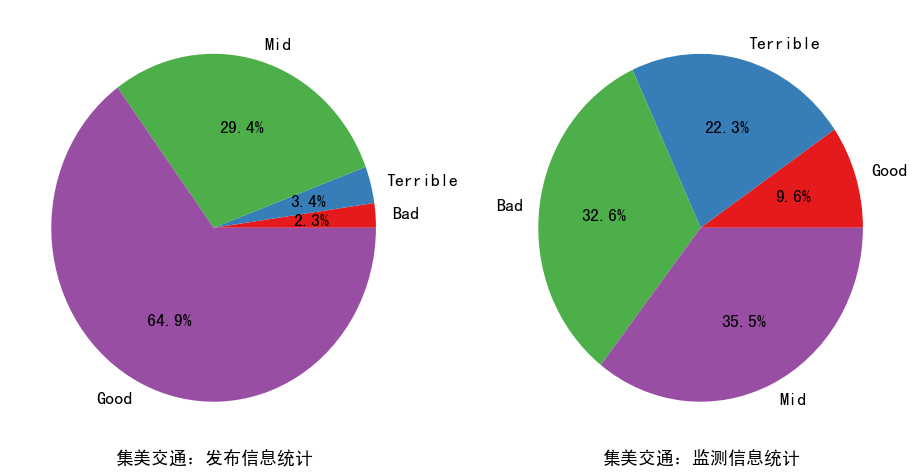

In [107]:
plt.figure(figsize=(16,8))
sns.set_palette('Set1')
plt.subplot(121)
jimei_public['PM2.5_level'].value_counts().sort_values().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('集美交通：发布信息统计',fontsize=18)
plt.ylabel('')
plt.subplot(122)
jimei_device['PM2.5_level'].value_counts().sort_values().plot.pie(autopct="%1.1f%%",fontsize=18)
plt.xlabel('集美交通：监测信息统计',fontsize=18)
plt.ylabel('')
# plt.savefig('集美：不同数据源PM2.5质量等级饼状图.jpg',dpi=400,bbox_inches = 'tight')

Text(0.5,1,'集美交通：不同数据源不同时间段下PM2.5平均值对比')

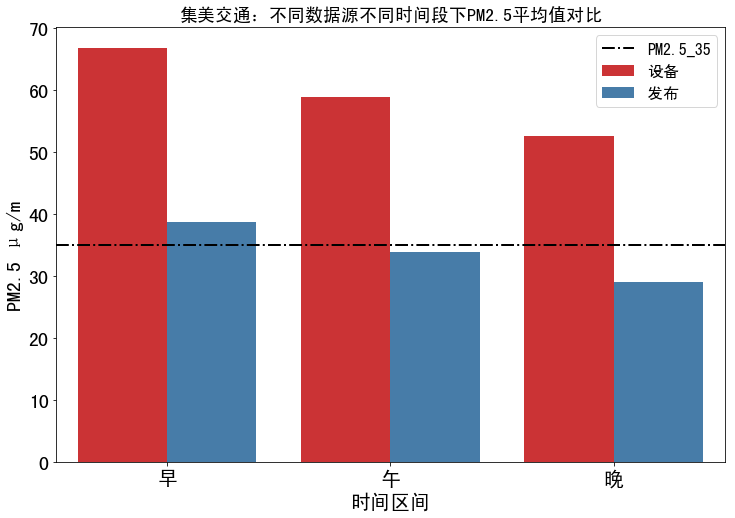

In [108]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
# plt.grid(linestyle="--")
# av = traffic[["PM2.5", "Time_Tags"]].groupby(['Time_Tags'],as_index=False).mean()
ax = sns.barplot(x='Time_tags', y='PM2.5',hue='Info_source',data = jimei,ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_xlabel("Time_episode",fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5 μg/m³",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
# ax.legend({'35':'e','Public':'ie','Device':'ooe'},fontsize=18)
ax.legend({'PM2.5_35':'e','设备':'设备','发布':'发布'},fontsize=16,loc='best')
plt.title('集美交通：不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('集美交通:不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400,bbox_inches = 'tight')

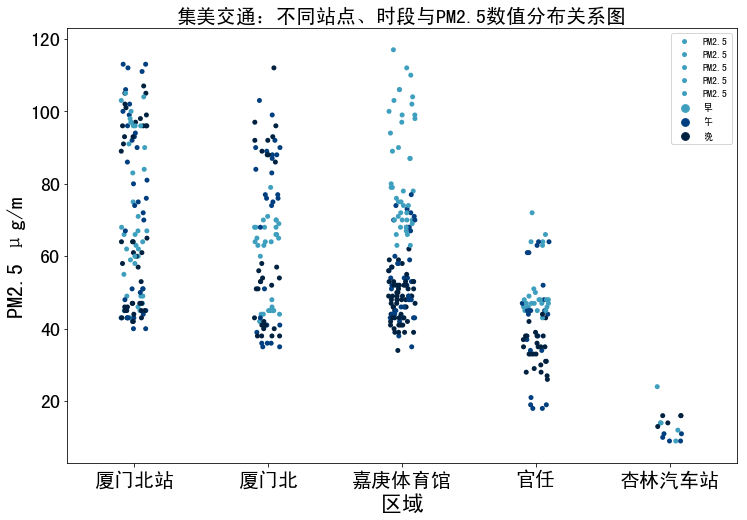

In [109]:
plt.figure(figsize=(12,8))
ax=sns.stripplot(x='Title',y='PM2.5',hue='Time_tags',jitter=True,data=jimei_device,palette='ocean_r')
ax.set_xlabel('区域',fontsize=22)
ax.set_ylabel('PM2.5 μg/m³',fontsize=22)
ax.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('集美交通：不同站点、时段与PM2.5数值分布关系图',fontsize=20)
plt.legend(handles=[],labels=['早','午','晚'],loc='best')
# plt.savefig('集美交通：不同区域、时段与PM2.5数值分布关系图.jpg',dpi=400,bbox_inches = 'tight')

## 4.3 时间维度

### 下面图为不同时间（早、中、晚）下，全厦门所测站点的PM2.5数值密度数据图
图中表明，以35数值线进行分析比较，早上的空气颗粒物浓度较中午和晚上稍好；但密度图主要面积出现在35分割线的右侧，说明交通站点在全天所选取的时段，其空气质量总体上不达标。

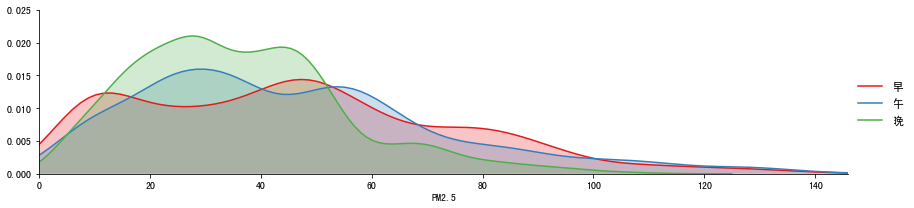

In [111]:
facet = sns.FacetGrid(traffic,hue='Time_tags',aspect=4)
facet.map(sns.kdeplot,'PM2.5',shade=True)
facet.set(xlim=(0,traffic['PM2.5'].max()))
facet.set(ylim=(0,0.025))
facet.add_legend(fontsize=12,title='')

In [112]:
traffic[['Time_tags','Zone','PM2.5']].groupby(['Time_tags','Zone']).mean()

PM2.5
Time_tags Zone           
午         同安区   89.500000
          思明区   48.238532
          湖里区   37.909357
          集美区   46.360294
早         同安区   76.611111
          思明区   47.368833
          湖里区   36.183612
          集美区   52.769231
晚         同安区   40.516667
          思明区   36.165094
          湖里区   32.530000
          集美区   40.850000

In [113]:
t_zone_time = traffic[['Time_tags','Zone','PM2.5']].groupby(['Zone','Time_tags']).mean()

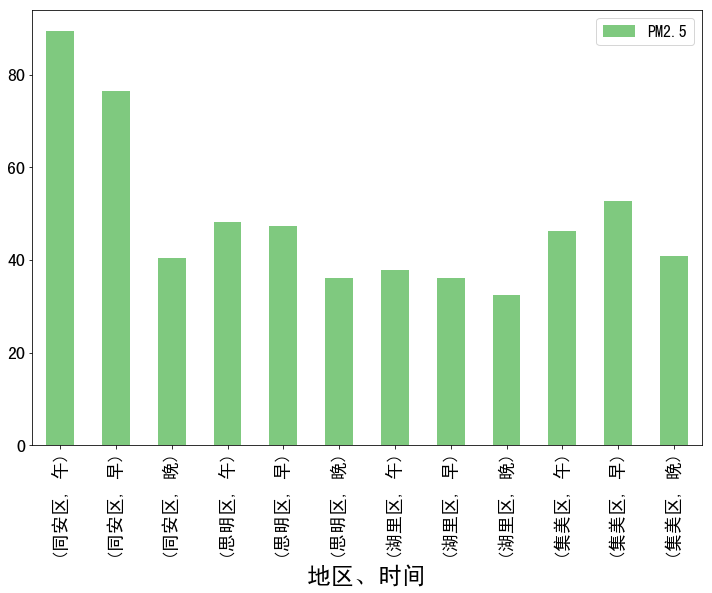

In [114]:
t_zone_time.plot(kind='bar',figsize=(12,8),colormap='Accent')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.xlabel('地区、时间',fontsize=24)
plt.savefig('不同地区时间下的PM2.5分布图.jpg',dpi=400,bbox_inches = 'tight')

## 4.4 温度维度

### 研究温度对PM2.5数值大小的影响
从图中可以得出，医院站点下，随着温度的升高，PM2.5数值的大小也随着升高，主要原因是...

同时进行横向比较：在同一温度条件下，不同时刻，医院早晨的空气质量均弱于中午和晚上的空气质量，主要原因是...就诊人员集中在早上，人流对PM2.5数值的影响

Text(0.5,1,'不同数据源不同时间段下PM2.5平均值对比')

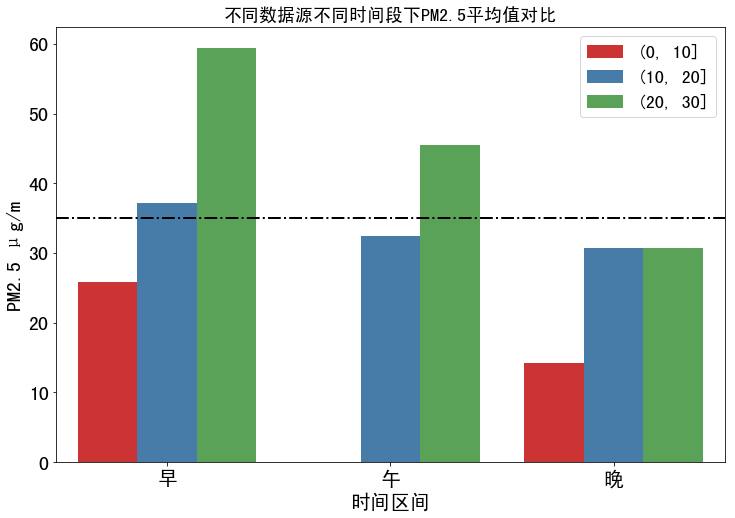

In [115]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Time_tags', y='PM2.5',hue='Temp_Level',data = data_df,order=['早','午','晚'],ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("时间区间",fontsize=20)
ax.set_ylabel("PM2.5 μg/m³",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend(fontsize=18)
plt.title('不同数据源不同时间段下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源不同时间段下PM2.5平均值对比.jpg',dpi=400)

### 不同数据源、温度区间下PM2.5平均值对比
不同温度区间，设备采集PM2.5数据值大小与温度区间无显著关系；
发布数据表明，0-30的温度区间内，PM2.5数值均达标；

Text(0.5,1,'不同数据源、温度区间下PM2.5平均值对比')

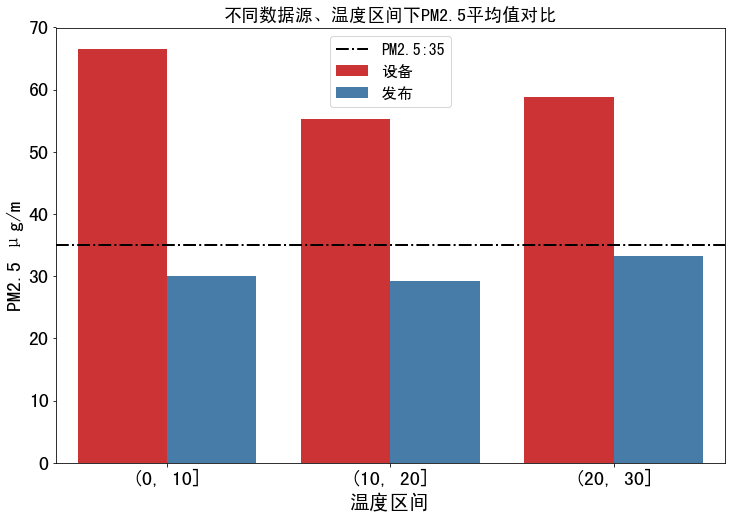

In [116]:
fig, axis1 = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='Temp_Level', y='PM2.5',hue='Info_source',data = traffic,ci=None,palette="Set1")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("温度区间",fontsize=20)
ax.set_ylabel("PM2.5 μg/m³",fontsize=20)
plt.axhline(y=35,c='black',ls='-.',lw='2')
ax.legend({'PM2.5:35':'e','设备':'设备','发布':'发布'},fontsize=16,loc='best')
plt.title('不同数据源、温度区间下PM2.5平均值对比',loc='center',fontsize=18)
# plt.savefig('不同数据源、温度区间下PM2.5平均值对比.jpg',dpi=400,bbox_inches = 'tight')

In [117]:
traffic[['Info_source','Temp_Level','PM2.5']].groupby(['Info_source','Temp_Level']).mean()

PM2.5
Info_source Temp_Level           
device      (0, 10]     66.600000
            (10, 20]    55.324303
            (20, 30]    58.821752
public      (0, 10]     30.000000
            (10, 20]    29.282182
            (20, 30]    33.259036

### 数据特征分布研究

### 在对温度下研究PM2.5的数值大小分布

从图中可知，在12-20℃的范围内，PM2.5数值浓度随着温度的升高而升高，在达到20℃后，温度的升高对PM2.5数值的影响达到顶峰，在现有温度数据条件下，温度对厦门交通站点空气质量的作用的极值在20℃。

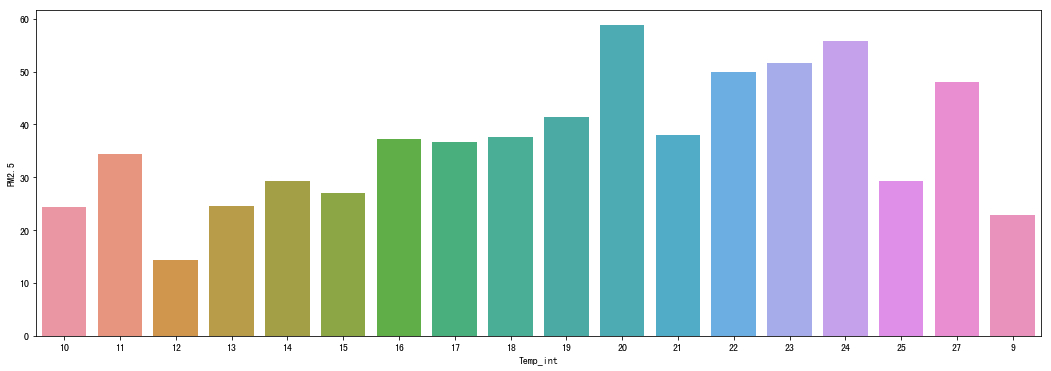

In [118]:
"""不同温度下，对应的PM2.5数值浓度@全数据"""
fig,axis1 = plt.subplots(1,1,figsize=(18,6))
data_df['Temp_int'] = data_df['Temp'].astype(str)
average_value = data_df[['Temp_int','PM2.5']].groupby('Temp_int',as_index=False).mean()
sns.barplot('Temp_int','PM2.5',data=average_value)

Text(0.5,1,'不同温度下，交通对应的PM2.5数值浓度')

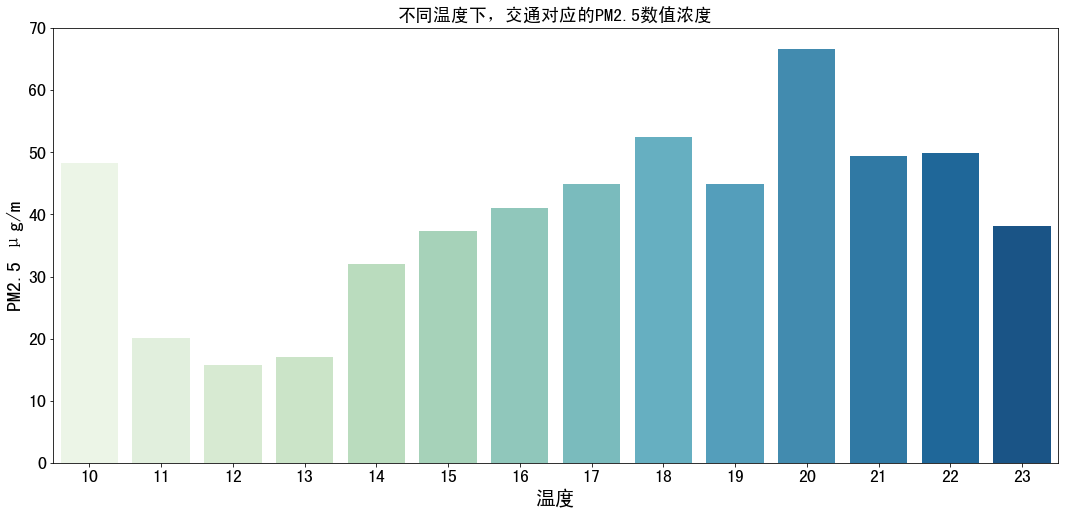

In [119]:
"""不同温度下，交通对应的PM2.5数值浓度"""
fig,axis1 = plt.subplots(1,1,figsize=(18,8))
traffic['Temp_int'] = traffic['Temp'].astype(str)
average_value = traffic[['Temp_int','PM2.5']].groupby('Temp_int',as_index=False).mean()
sns.barplot('Temp_int','PM2.5',data=average_value,palette='GnBu')
plt.xlabel(u"温度",fontsize=20)# plots an axis lable
plt.ylabel(u"PM2.5 μg/m³",fontsize=20) 
# plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('不同温度下，交通对应的PM2.5数值浓度',fontsize=18)
# plt.savefig('不同温度下，对应的PM2.5数值浓度.jpg',dpi=400,bbox_inches = 'tight')

## 5.其他影响因素
### 湿度、风速

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text yticklabel objects>)

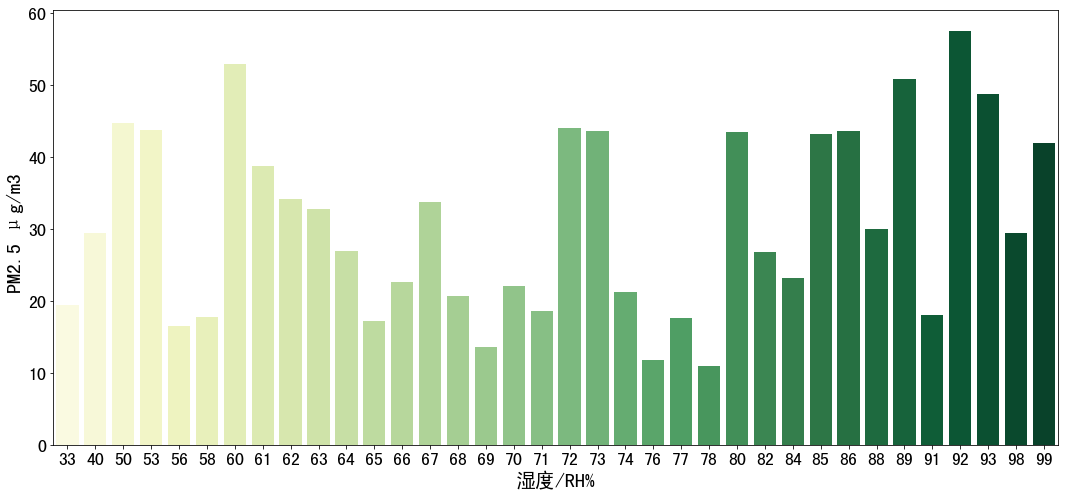

In [120]:
"""不同温度下，对应的PM2.5数值浓度@全数据"""
fig,axis1 = plt.subplots(1,1,figsize=(18,8))
hygiene['Humidity_int'] = hygiene['Humidity'].astype(str)
average_value = hygiene[['Humidity_int','PM2.5']].groupby('Humidity_int',as_index=False).mean()
sns.barplot('Humidity_int','PM2.5',data=average_value,palette='YlGn')
plt.xlabel(u"湿度/RH%",fontsize=20)# plots an axis lable
plt.ylabel(u"PM2.5 μg/m3 ",fontsize=20) 
# plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.savefig('不同温度下，对应的PM2.5与湿度数值关系图.jpg',dpi=400,bbox_inches = 'tight')

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

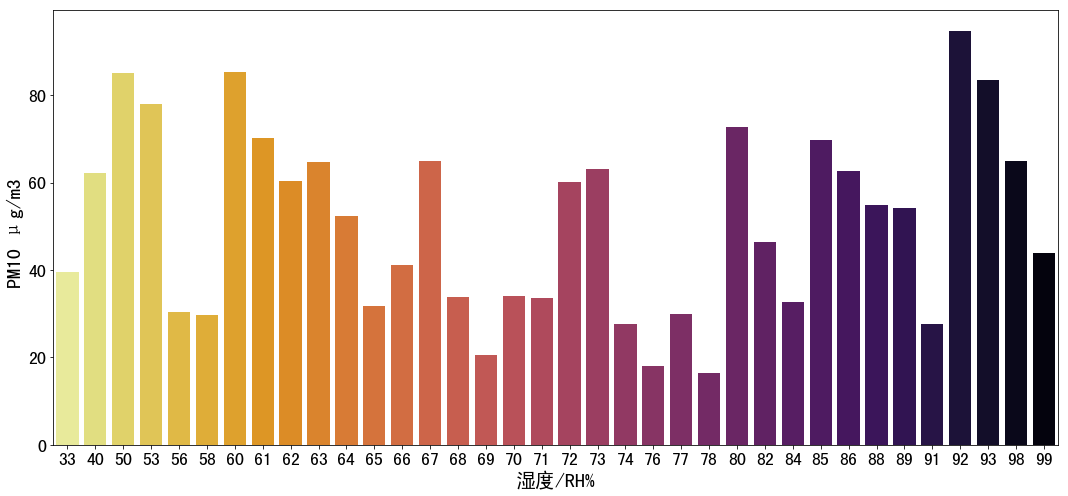

In [121]:
"""不同温度下，对应的PM10数值浓度@全数据"""
fig,axis1 = plt.subplots(1,1,figsize=(18,8))
hygiene['Humidity_int'] = hygiene['Humidity'].astype(str)
average_value = hygiene[['Humidity_int','PM10']].groupby('Humidity_int',as_index=False).mean()
sns.barplot('Humidity_int','PM10',data=average_value,palette='inferno_r')
plt.xlabel(u"湿度/RH%",fontsize=20)# plots an axis lable
plt.ylabel(u"PM10 μg/m3 ",fontsize=20) 
# plt.axhline(y=35,c='black',ls='-.',lw='2')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.savefig('不同温度下，对应的PM10与湿度数值关系图.jpg',dpi=400,bbox_inches = 'tight')

In [122]:
hygiene.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11896 entries, 0 to 17677
Data columns (total 23 columns):
PM2.5              11896 non-null int64
PM10               11896 non-null int64
HCHO               11896 non-null float64
VOC                11896 non-null object
O3                 10957 non-null object
Temp               11896 non-null int64
Humidity           11896 non-null int64
AQI                11896 non-null int64
Wind_Orient        11896 non-null object
Wind_Level         11896 non-null object
Location           11896 non-null object
Type               11896 non-null object
Zone               11896 non-null object
Date               11896 non-null datetime64[ns]
Time               11896 non-null object
Info_source        11896 non-null object
PM2.5_level        11813 non-null category
Temp_Level         11896 non-null category
PM2.5_threshold    11813 non-null category
Day_tags           11896 non-null object
Time_tags          11896 non-null object
Title              1

In [123]:
hygiene['Temp_int'] = hygiene['Temp'].astype(str)

In [124]:
hygiene['Title'] = hygiene.Title.fillna('U0') # data_df.Title[data_df.Title.isnull()]='U0'
hygiene['O3'] = hygiene['O3'].convert_objects(convert_numeric=True)
hygiene['VOC'] = hygiene['VOC'].convert_objects(convert_numeric=True)
hygiene['Temp_int'] = hygiene['Temp_int'].convert_objects(convert_numeric=True)
hygiene['PM2.5'] = hygiene['PM2.5'].convert_objects(convert_numeric=True)


In [125]:
hygiene['Wind_Orient'] = pd.factorize(hygiene['Wind_Orient'])[0]
hygiene['Wind_Level'] = pd.factorize(hygiene['Wind_Level'])[0]
hygiene['Zone'] = pd.factorize(hygiene['Zone'])[0]
hygiene['Type'] = pd.factorize(hygiene['Type'])[0]
hygiene['Info_source'] = pd.factorize(hygiene['Info_source'])[0]
hygiene['PM2.5_level'] = pd.factorize(hygiene['PM2.5_level'])[0]
hygiene['Temp_Level'] = pd.factorize(hygiene['Temp_Level'])[0]
hygiene['PM2.5_threshold'] = pd.factorize(hygiene['PM2.5_threshold'])[0]
hygiene['Time_tags'] = pd.factorize(hygiene['Time_tags'])[0]
hygiene['Day_tags'] = pd.factorize(hygiene['Day_tags'])[0]

In [126]:
data_process = hygiene.drop(['Location','Date','Title','Temp_int'],axis=1)

In [127]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11896 entries, 0 to 17677
Data columns (total 20 columns):
PM2.5              11896 non-null int64
PM10               11896 non-null int64
HCHO               11896 non-null float64
VOC                11894 non-null float64
O3                 10957 non-null float64
Temp               11896 non-null int64
Humidity           11896 non-null int64
AQI                11896 non-null int64
Wind_Orient        11896 non-null int64
Wind_Level         11896 non-null int64
Type               11896 non-null int64
Zone               11896 non-null int64
Time               11896 non-null object
Info_source        11896 non-null int64
PM2.5_level        11896 non-null int64
Temp_Level         11896 non-null int64
PM2.5_threshold    11896 non-null int64
Day_tags           11896 non-null int64
Time_tags          11896 non-null int64
Humidity_int       11896 non-null object
dtypes: float64(3), int64(15), object(2)
memory usage: 2.2+ MB


In [128]:
data_process = data_process.rename(columns={'Temp':'温度','Humidity':'湿度','Wind_Orient':'风向','Wind_Level':'风级','Zone':'区域',
                           'PM2.5_level':'PM2.5分级','Temp_Level':'温度分级','PM2.5_threshold':'PM2.5超标阈值',
                             'Time_tags':'时间区间' })
data_process = data_process.drop(['Type','Info_source','Day_tags','Time'],axis=1)

In [129]:
data_process.columns

Index(['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', '温度', '湿度', 'AQI', '风向', '风级',
       '区域', 'PM2.5分级', '温度分级', 'PM2.5超标阈值', '时间区间', 'Humidity_int'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text yticklabel objects>)

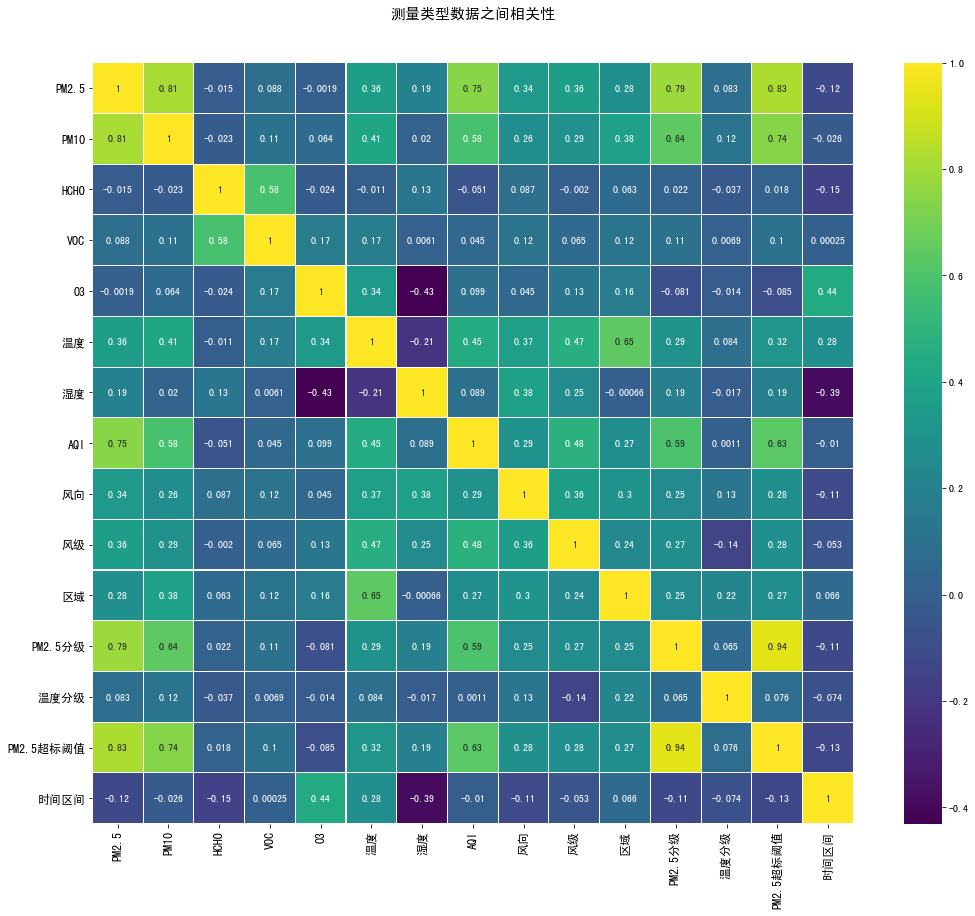

In [130]:
Correlation = pd.DataFrame(data_process[
    ['PM2.5', 'PM10', 'HCHO', 'VOC', 'O3', '温度', '湿度', 'AQI', '风向', '风级',
       '区域',  'PM2.5分级', '温度分级', 'PM2.5超标阈值', '时间区间']])

colormap = plt.cm.viridis
plt.figure(figsize=(18,14))
plt.title('测量类型数据之间相关性', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig('测量类型数据之间相关性.jpg',dpi=400,bbox_inches = 'tight')